## <font color="green">Carbon Emissions Analysis</font>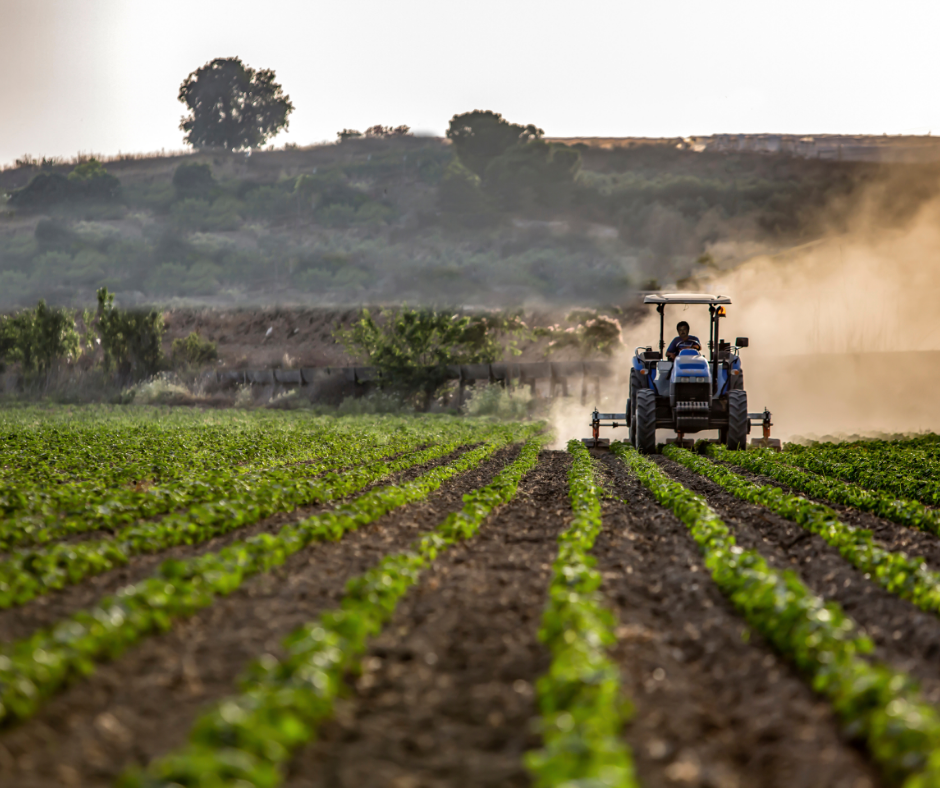

## Table of Contents


>>[Carbon Emissions Analysis](#scrollTo=lHAwXgQslDTy)

>>[Table of Contents](#scrollTo=aQ-mvsuXlUiY)

>>>>[Importing all the required modules for the notebook to run](#scrollTo=be2deb50)

>>[Load and Clean Data](#scrollTo=9fc7fc3d-6ae9-4284-9885-532d533b45ee)

>>[Clean Column Names](#scrollTo=51643353)

>>[DataFrame Information](#scrollTo=7bb48dbb)

>>[Missing Values Analysis](#scrollTo=fda06cb4)

>>[Summary of Missing Values](#scrollTo=681f5fff)

>>>[Handling missing data:](#scrollTo=681f5fff)

>>[Histogram Distribution of Columns with Missing Values](#scrollTo=681f5fff)

>>[Histogram Distribution of Columns with Missing Values](#scrollTo=1947c77a)

>>[Filling Missing Values](#scrollTo=1947c77a)

>>[Summary of Missing Values after Imputation](#scrollTo=dd09c292)

>>[Exploratory Data Analysis](#scrollTo=dbad0e53)

>>>[Summary of Descriptive Statistics](#scrollTo=dbad0e53)

>>>[Removing Duplicate Rows](#scrollTo=7a30217b)

>>>[Value Counts for a Specific Column](#scrollTo=4f6cb846)

>>>[Histograms for All Columns](#scrollTo=ef4f8c9f)

>>>[Exploring Relationships between Variables](#scrollTo=2334a275)

>>>>[Procedure Overview:](#scrollTo=2334a275)

>>>>[Visualization:](#scrollTo=2334a275)

>>>[Total Population by Gender](#scrollTo=46c05e7e)

>>>>[Procedure Overview:](#scrollTo=46c05e7e)

>>>>[Visualization:](#scrollTo=46c05e7e)

>>[Preprocessing](#scrollTo=e8b870aa-ae02-4f35-9001-1322287bae6b)

>>>[Feature Selection using VIF](#scrollTo=48c7c6ff)

>>>>[Why VIF?](#scrollTo=48c7c6ff)

>>>>[Conclusion:](#scrollTo=48c7c6ff)

>>[Model Building](#scrollTo=ba40bbab-a0ad-4f28-8c78-7e6e18e6481b)

>>>[Extreme Gradient Boosting(XGBoost)](#scrollTo=I91t3X64SiJu)

>>>[Bagging regressor](#scrollTo=pUHZheB-tOWP)

>>>[Stacking Ensemble Models](#scrollTo=YHoR5so_Qu8a)



## Project Overview


### Introduction
Our project is dedicated to analyzing and predicting CO2 emissions within the agri-food sector. Our mission is clear where we are utilizing data sourced from the FAO and IPCC, we aim to gain deep insights into carbon emissions, their sources, and impacts on climate change. With a dataset boasting over 7000 records and more than 30 features, our focus is on unraveling the intricate web of factors influencing carbon emissions in agriculture and food production. Our goal is to develop sustainable strategies that resonate with key stakeholders, including policymakers and agricultural businesses, paving the way towards a greener future.

### Problem Statement
The agri-food sector significantly contributes to global CO2 emissions, exacerbating climate change. Key sources such as crop residues, rice cultivation, food transport, and manure management substantially add to the sector's carbon footprint. Despite its role in food production and economic stability, the sector's environmental impact is a pressing concern. Moreover, the potential of forestland as a carbon sink is underutilized, with sustainable forest management practices not widely adopted.

### Objectives


*     Analyze CO2 emissions trends: Explore historical data to identify patterns and trends in CO2 emissions within the agri-food sector, shedding light on how emissions have evolved over time.
*    Predict future emissions: Utilize predictive modeling techniques to forecast CO2 emissions from the agri-food sector

*    Understand climate impacts: Investigate the relationship between CO2 emissions from agri-food activities and their broader climate impacts
*      Develop sustainable strategies: Develop data-driven strategies aimed at reducing CO2 emissions from the agri-food sector while promoting sustainable practices





#### Importing all the required modules for the notebook to run

The following code cell imports all the necessary modules to ensure that the notebook runs smoothly. By importing these modules at the beginning of the notebook, we can use their functions and classes throughout the notebook without having to re-import them in each cell.

The imported modules include essential libraries for data manipulation, visualization, and machine learning, such as NumPy, Pandas, Matplotlib, and scikit-learn. Additionally, any custom modules or functions needed for the project may also be imported in this cell.


In [114]:
%matplotlib inline

# Standard library imports
import math
import warnings

# Third-party imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import r2_score, mean_squared_error,  mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import StackingRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Suppress warnings
warnings.filterwarnings('ignore')

## Load and Clean Data

This section of the notebook is dedicated to loading the dataset containing CO2 emissions from agriculture and performing any necessary cleaning steps. The dataset is loaded using the `pd.read_csv()` function from the pandas library.

The dataset is expected to be stored in a CSV file named "co2_emissions_from_agri.csv". After loading the data into a pandas DataFrame (`df`), the `head()` method is used to display the first few rows of the DataFrame, providing an initial glimpse of the data structure and contents.

This initial exploration allows us to verify that the data has been loaded correctly and to identify any potential issues or inconsistencies that may require cleaning or preprocessing.


In [115]:
df = pd.read_csv("co2_emissions_from_agri.csv")
df.head()

Area  Year  Savanna fires  Forest fires  Crop Residues  \
0  Afghanistan  1990        14.7237        0.0557       205.6077   
1  Afghanistan  1991        14.7237        0.0557       209.4971   
2  Afghanistan  1992        14.7237        0.0557       196.5341   
3  Afghanistan  1993        14.7237        0.0557       230.8175   
4  Afghanistan  1994        14.7237        0.0557       242.0494   

   Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
0            686.00                          0.0                 11.807483   
1            678.16                          0.0                 11.712073   
2            686.00                          0.0                 11.712073   
3            686.00                          0.0                 11.712073   
4            705.60                          0.0                 11.712073   

   Food Transport  Forestland  ...  Manure Management  Fires in organic soils  \
0         63.1152   -2388.803  ...           319.1763                     0.0   
1         61.2125   -2388.803  ...           342.3079                     0.0   
2         53.3170   -2388.803  ...           349.1224                     0.0   
3         54.3617   -2388.803  ...           352.2947                     0.0   
4         53.9874   -2388.803  ...           367.6784                     0.0   

   Fires in humid tropical forests  On-farm energy use  Rural population  \
0                              0.0                 NaN         9655167.0   
1                              0.0                 NaN        10230490.0   
2                              0.0                 NaN        10995568.0   
3                              0.0                 NaN        11858090.0   
4                              0.0                 NaN        12690115.0   

   Urban population  Total Population - Male  Total Population - Female  \
0         2593947.0                5348387.0                  5346409.0   
1         2763167.0                5372959.0                  5372208.0   
2         2985663.0                6028494.0                  6028939.0   
3         3237009.0                7003641.0                  7000119.0   
4         3482604.0                7733458.0                  7722096.0   

   total_emission  Average Temperature °C  
0     2198.963539                0.536167  
1     2323.876629                0.020667  
2     2356.304229               -0.259583  
3     2368.470529                0.101917  
4     2500.768729                0.372250  

[5 rows x 31 columns]

Clean Column Names


In [116]:
df.columns = [col.replace(" ", "_") for col in df.columns]
df.head()

Area  Year  Savanna_fires  Forest_fires  Crop_Residues  \
0  Afghanistan  1990        14.7237        0.0557       205.6077   
1  Afghanistan  1991        14.7237        0.0557       209.4971   
2  Afghanistan  1992        14.7237        0.0557       196.5341   
3  Afghanistan  1993        14.7237        0.0557       230.8175   
4  Afghanistan  1994        14.7237        0.0557       242.0494   

   Rice_Cultivation  Drained_organic_soils_(CO2)  Pesticides_Manufacturing  \
0            686.00                          0.0                 11.807483   
1            678.16                          0.0                 11.712073   
2            686.00                          0.0                 11.712073   
3            686.00                          0.0                 11.712073   
4            705.60                          0.0                 11.712073   

   Food_Transport  Forestland  ...  Manure_Management  Fires_in_organic_soils  \
0         63.1152   -2388.803  ...           319.1763                     0.0   
1         61.2125   -2388.803  ...           342.3079                     0.0   
2         53.3170   -2388.803  ...           349.1224                     0.0   
3         54.3617   -2388.803  ...           352.2947                     0.0   
4         53.9874   -2388.803  ...           367.6784                     0.0   

   Fires_in_humid_tropical_forests  On-farm_energy_use  Rural_population  \
0                              0.0                 NaN         9655167.0   
1                              0.0                 NaN        10230490.0   
2                              0.0                 NaN        10995568.0   
3                              0.0                 NaN        11858090.0   
4                              0.0                 NaN        12690115.0   

   Urban_population  Total_Population_-_Male  Total_Population_-_Female  \
0         2593947.0                5348387.0                  5346409.0   
1         2763167.0                5372959.0                  5372208.0   
2         2985663.0                6028494.0                  6028939.0   
3         3237009.0                7003641.0                  7000119.0   
4         3482604.0                7733458.0                  7722096.0   

   total_emission  Average_Temperature_°C  
0     2198.963539                0.536167  
1     2323.876629                0.020667  
2     2356.304229               -0.259583  
3     2368.470529                0.101917  
4     2500.768729                0.372250  

[5 rows x 31 columns]

DataFrame Information


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna_fires                    6934 non-null   float64
 3   Forest_fires                     6872 non-null   float64
 4   Crop_Residues                    5576 non-null   float64
 5   Rice_Cultivation                 6965 non-null   float64
 6   Drained_organic_soils_(CO2)      6965 non-null   float64
 7   Pesticides_Manufacturing         6965 non-null   float64
 8   Food_Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net_Forest_conversion            6472 non-null   float64
 11  Food_Household_Consumption       6492 non-null   float64
 12  Food_Retail         

The DataFrame contains 6965 rows and 31 columns. Below is a concise summary of its structure:

- **Data Types**: 
  - 1 object column (`Area`)
  - 1 int64 column (`Year`)
  - 29 float64 columns (various measurements and indicators)

- **Non-Null Entries**: Most columns have 6965 non-null entries, but several columns have missing values:
  - `Savanna_fires`: 6934 non-null
  - `Forest_fires`: 6872 non-null
  - `Crop_Residues`: 5576 non-null
  - and others with varying counts of non-null entries.

- **Memory Usage**: Approximately 1.6 MB


In [118]:
df.describe()

Year  Savanna_fires  Forest_fires  Crop_Residues  \
count  6965.000000    6934.000000   6872.000000    5576.000000   
mean   2005.124910    1188.390893    919.302167     998.706309   
std       8.894665    5246.287783   3720.078752    3700.345330   
min    1990.000000       0.000000      0.000000       0.000200   
25%    1997.000000       0.000000      0.000000      11.006525   
50%    2005.000000       1.651850      0.517900     103.698200   
75%    2013.000000     111.081400     64.950775     377.640975   
max    2020.000000  114616.401100  52227.630600   33490.074100   

       Rice_Cultivation  Drained_organic_soils_(CO2)  \
count       6965.000000                  6965.000000   
mean        4259.666673                  3503.228636   
std        17613.825187                 15861.445678   
min            0.000000                     0.000000   
25%          181.260800                     0.000000   
50%          534.817400                     0.000000   
75%         1536.640000                   690.408800   
max       164915.255600                241025.069600   

       Pesticides_Manufacturing  Food_Transport     Forestland  \
count               6965.000000     6965.000000    6472.000000   
mean                 333.418393     1939.581760  -17828.285678   
std                 1429.159367     5616.748808   81832.210543   
min                    0.000000        0.000100 -797183.079000   
25%                    6.000000       27.958600   -2848.350000   
50%                   13.000000      204.962800     -62.920000   
75%                  116.325487     1207.000900       0.000000   
max                16459.000000    67945.765000  171121.076000   

       Net_Forest_conversion  ...  Manure_Management  Fires_in_organic_soils  \
count           6.472000e+03  ...        6037.000000             6965.000000   
mean            1.760564e+04  ...        2263.344946             1210.315532   
std             1.011575e+05  ...        7980.542461            22669.847760   
min             0.000000e+00  ...           0.432900                0.000000   
25%             0.000000e+00  ...          37.632100                0.000000   
50%             4.444000e+01  ...         269.856300                0.000000   
75%             4.701746e+03  ...        1126.818900                0.000000   
max             1.605106e+06  ...       70592.646500           991717.543100   

       Fires_in_humid_tropical_forests  On-farm_energy_use  Rural_population  \
count                      6810.000000         6009.000000      6.965000e+03   
mean                        668.452931         3008.982252      1.785774e+07   
std                        3264.879486        12637.864430      8.901521e+07   
min                           0.000000            0.031900      0.000000e+00   
25%                           0.000000           13.291900      9.731100e+04   
50%                           0.000000          141.096300      1.595322e+06   
75%                           9.577875         1136.925400      8.177340e+06   
max                       51771.256800       248879.176900      9.000991e+08   

       Urban_population  Total_Population_-_Male  Total_Population_-_Female  \
count      6.965000e+03             6.965000e+03               6.965000e+03   
mean       1.693230e+07             1.761963e+07               1.732447e+07   
std        6.574362e+07             7.603993e+07               7.251711e+07   
min        0.000000e+00             2.500000e+02               2.700000e+02   
25%        2.173860e+05             2.013260e+05               2.078900e+05   
50%        2.357581e+06             2.469660e+06               2.444135e+06   
75%        8.277123e+06             9.075924e+06               9.112588e+06   
max        9.020778e+08             7.435866e+08               7.133419e+08   

       total_emission  Average_Temperature_°C  
count    6.965000e+03             6965.000000  
mean     6.409124e+04                0.872989  
std      2.283130e+05

Missing Values Analysis


In [119]:
df.isna().sum()

Area                                  0
Year                                  0
Savanna_fires                        31
Forest_fires                         93
Crop_Residues                      1389
Rice_Cultivation                      0
Drained_organic_soils_(CO2)           0
Pesticides_Manufacturing              0
Food_Transport                        0
Forestland                          493
Net_Forest_conversion               493
Food_Household_Consumption          473
Food_Retail                           0
On-farm_Electricity_Use               0
Food_Packaging                        0
Agrifood_Systems_Waste_Disposal       0
Food_Processing                       0
Fertilizers_Manufacturing             0
IPPU                                743
Manure_applied_to_Soils             928
Manure_left_on_Pasture                0
Manure_Management                   928
Fires_in_organic_soils                0
Fires_in_humid_tropical_forests     155
On-farm_energy_use                  956


Summary of Missing Values

* Some columns of the DataFrame contain missing values. For example, `Savanna_fires` has 31 missing values. Therefore, we need to impute these missing values using appropriate statistical approaches.


Handling missing data:
- Mean-It is preferred if data is numeric and not skewed.


* Median-It is preferred if data is numeric and skewed

* Mode-It is preferred if the data is a string(object) or numeric.

Histogram Distribution of Columns with Missing Values

The cell below generates histograms to visualize the distribution of values for columns that have missing data. By examining these histograms, we can better understand the data distributions and identify any potential outliers or anomalies within these columns. This visualization is crucial for assessing the nature of the missing data and planning appropriate data cleaning and preprocessing steps.


array([[<Axes: title={'center': 'Savanna_fires'}>,
        <Axes: title={'center': 'Forest_fires'}>,
        <Axes: title={'center': 'Crop_Residues'}>],
       [<Axes: title={'center': 'Forestland'}>,
        <Axes: title={'center': 'Net_Forest_conversion'}>,
        <Axes: title={'center': 'Food_Household_Consumption'}>],
       [<Axes: title={'center': 'IPPU'}>,
        <Axes: title={'center': 'Manure_applied_to_Soils'}>,
        <Axes: title={'center': 'Manure_Management'}>],
       [<Axes: title={'center': 'On-farm_energy_use'}>, <Axes: >,
        <Axes: >]], dtype=object)

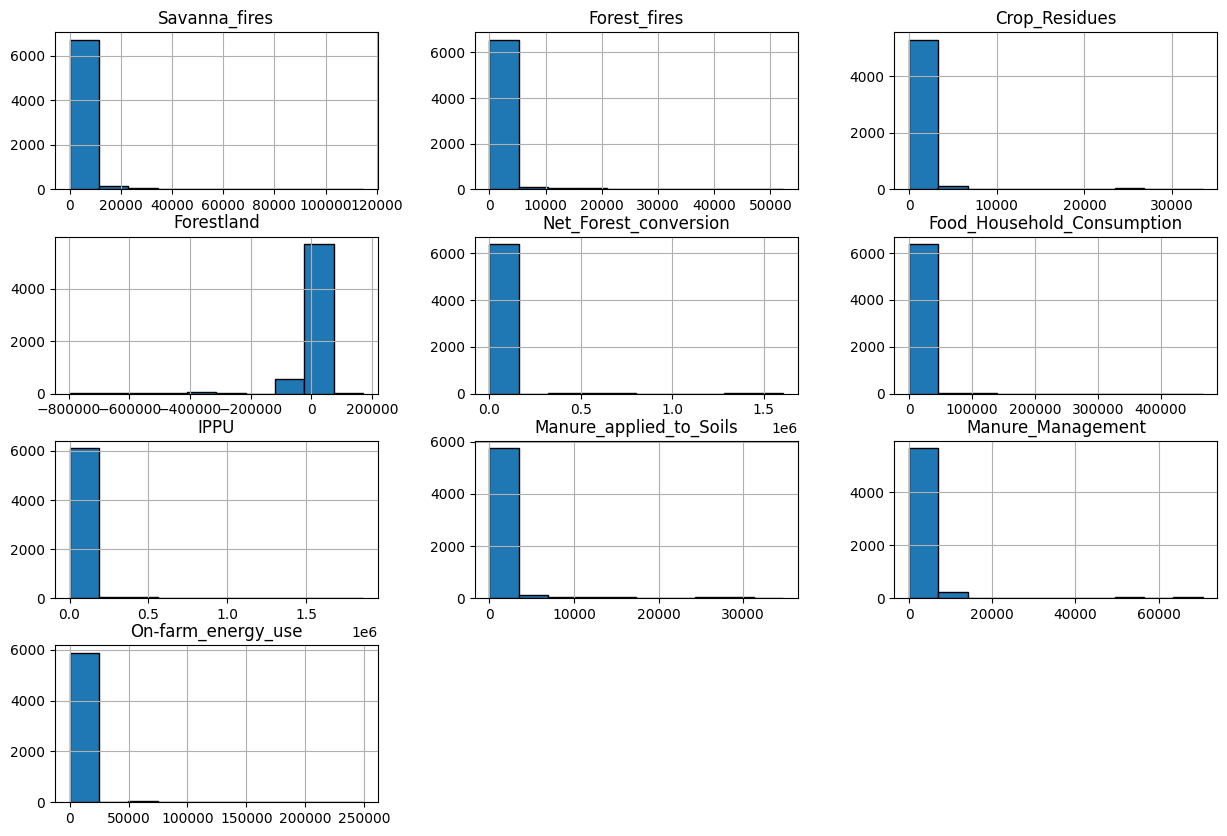

In [120]:
df_check = df[
    [
        "Savanna_fires",
        "Forest_fires",
        "Crop_Residues",
        "Forestland",
        "Net_Forest_conversion",
        "Food_Household_Consumption",
        "IPPU",
        "Manure_applied_to_Soils",
        "Manure_Management",
        "On-farm_energy_use",
    ]
]

df_check.hist(bins=10, figsize=(15, 10), edgecolor="black")


The visualizations above display histograms to visualize the distribution of values for columns that have missing data. The summary of the distributions is as follows:

- Most of the histograms have a single, long bar indicating a concentration of values in one bin, which suggests low variability in these columns.
- A few histograms display two bars, with the second bar being very small and potentially negligible. This indicates that while most data points are clustered within a specific range, there are some values that slightly deviate from this cluster.

These visualizations help us understand that the majority of the data points are concentrated within a narrow range for most columns, indicating low variability. The presence of small additional bars in a few histograms suggests minimal deviation or outliers in those columns. This information is crucial for assessing the nature of the missing data and planning appropriate data cleaning and preprocessing steps.
 
Filling Missing Values

* The cell below fills in missing values in the numeric columns of the DataFrame using the median. This approach is chosen to avoid the potential impact of outliers on the imputation process.

* By replacing missing values with the median, which is robust to outliers, we ensure that the integrity of the data is maintained while preparing it for further analysis or modeling. These preprocessing steps are crucial for ensuring the accuracy and reliability of the subsequent analysis.


In [121]:
numeric_cols = df.select_dtypes(include=[np.number])
non_numeric_cols = df.select_dtypes(exclude=[np.number])

# Fill NaN values in numeric columns with the mean of each column
numeric_cols_filled = numeric_cols.fillna(numeric_cols.median())

df_filled = pd.concat([non_numeric_cols, numeric_cols_filled], axis=1)

df = df_filled.copy()
df.isna().sum()

Area                               0
Year                               0
Savanna_fires                      0
Forest_fires                       0
Crop_Residues                      0
Rice_Cultivation                   0
Drained_organic_soils_(CO2)        0
Pesticides_Manufacturing           0
Food_Transport                     0
Forestland                         0
Net_Forest_conversion              0
Food_Household_Consumption         0
Food_Retail                        0
On-farm_Electricity_Use            0
Food_Packaging                     0
Agrifood_Systems_Waste_Disposal    0
Food_Processing                    0
Fertilizers_Manufacturing          0
IPPU                               0
Manure_applied_to_Soils            0
Manure_left_on_Pasture             0
Manure_Management                  0
Fires_in_organic_soils             0
Fires_in_humid_tropical_forests    0
On-farm_energy_use                 0
Rural_population                   0
Urban_population                   0
T

Summary of Missing Values after Imputation

The output above shows the number of missing values in each column of the DataFrame after the imputation process.

- All columns now have zero missing values, indicating that the missing values have been successfully filled using the median of each numeric column.
- This confirms that the data preprocessing step to handle missing values was effective, and the DataFrame is now ready for further analysis or modeling.

Ensuring that there are no missing values in the dataset is essential for maintaining the integrity and reliability of the data analysis results. This summary confirms that the missing data issue has been appropriately addressed, laying a solid foundation for subsequent analytical tasks.


## Exploratory Data Analysis

 Summary of Descriptive Statistics

* The cell below provides a summary of descriptive statistics for the DataFrame.


* Analyzing descriptive statistics is essential for gaining insights into the distribution and characteristics of the data, which can inform subsequent analysis and modeling tasks.


In [122]:
df.describe().T

count          mean           std  \
Year                             6965.0  2.005125e+03  8.894665e+00   
Savanna_fires                    6965.0  1.183109e+03  5.235194e+03   
Forest_fires                     6965.0  9.070341e+02  3.696660e+03   
Crop_Residues                    6965.0  8.202187e+02  3.330079e+03   
Rice_Cultivation                 6965.0  4.259667e+03  1.761383e+04   
Drained_organic_soils_(CO2)      6965.0  3.503229e+03  1.586145e+04   
Pesticides_Manufacturing         6965.0  3.334184e+02  1.429159e+03   
Food_Transport                   6965.0  1.939582e+03  5.616749e+03   
Forestland                       6965.0 -1.657081e+04  7.901397e+04   
Net_Forest_conversion            6965.0  1.636262e+04  9.761518e+04   
Food_Household_Consumption       6965.0  4.528935e+03  2.492591e+04   
Food_Retail                      6965.0  2.043211e+03  8.494249e+03   
On-farm_Electricity_Use          6965.0  1.626681e+03  9.343182e+03   
Food_Packaging                   6965.0  1.658630e+03  1.148134e+04   
Agrifood_Systems_Waste_Disposal  6965.0  6.018445e+03  2.215674e+04   
Food_Processing                  6965.0  3.872724e+03  1.983822e+04   
Fertilizers_Manufacturing        6965.0  3.035723e+03  1.169303e+04   
IPPU                             6965.0  1.794462e+04  1.054759e+05   
Manure_applied_to_Soils          6965.0  8.162649e+02  3.016662e+03   
Manure_left_on_Pasture           6965.0  3.518027e+03  9.103556e+03   
Manure_Management                6965.0  1.997737e+03  7.460634e+03   
Fires_in_organic_soils           6965.0  1.210316e+03  2.266985e+04   
Fires_in_humid_tropical_forests  6965.0  6.535771e+02  3.229847e+03   
On-farm_energy_use               6965.0  2.615343e+03  1.177983e+04   
Rural_population                 6965.0  1.785774e+07  8.901521e+07   
Urban_population                 6965.0  1.693230e+07  6.574362e+07   
Total_Population_-_Male          6965.0  1.761963e+07  7.603993e+07   
Total_Population_-_Female        6965.0  1.732447e+07  7.251711e+07   
total_emission                   6965.0  6.409124e+04  2.283130e+05   
Average_Temperature_°C           6965.0  8.729891e-01  5.559295e-01   

                                           min            25%           50%  \
Year                               1990.000000    1997.000000  2.005000e+03   
Savanna_fires                         0.000000       0.000000  1.651850e+00   
Forest_fires                          0.000000       0.000000  5.179000e-01   
Crop_Residues                         0.000200      25.360100  1.036982e+02   
Rice_Cultivation                      0.000000     181.260800  5.348174e+02   
Drained_organic_soils_(CO2)           0.000000       0.000000  0.000000e+00   
Pesticides_Manufacturing              0.000000       6.000000  1.300000e+01   
Food_Transport                        0.000100      27.958600  2.049628e+02   
Forestland                      -797183.079000   -2299.387200 -6.292000e+01   
Net_Forest_conversion                 0.000000       0.000000  4.444000e+01   
Food_Household_Consumption            0.000000      13.797400  1.554711e+02   
Food_Retail                           0.000000      26.818500  1.720426e+02   
On-farm_Electricity_Use               0.000000       8.037600  2.912070e+01   
Food_Packaging                        0.000000      67.631366  7.401813e+01   
Agrifood_Systems_Waste_Disposal       0.340000      86.680500  9.012757e+02   
Food_Processing                       0.000100     209.587728  3.447602e+02   
Fertilizers_Manufacturing             0.001900     360.358799  1.115052e+03   
IPPU                                  0.000000      51.930700  8.037066e+02   
Manure_applied_to_Soils               0.049000      23.119500  1.204439e+02   
Manure_left_on_Pasture                0.000700     139.669900  9.725674e+02   
Manure_Management                     0.432900      52.707800  2.698563e+02   
Fires_in_organic_soils                0.000000       0.000000  0.000000e+00   
Fires_in_humid_

The DataFrame's descriptive statistics reveal the following key points:

- The dataset spans from the year 1990 to 2020.
- Many columns have high variability in their values (e.g., `Savanna_fires`, `Forest_fires`, `Crop_Residues`).
- Some columns have negative values (e.g., `Forestland` and `total_emission`).
- Population columns (`Rural_population`, `Urban_population`, `Total_Population_-_Male`, `Total_Population_-_Female`) have extremely large ranges, reflecting diverse geographical areas.

Overall, the dataset has substantial variability, with some columns containing extreme values and large ranges.



### Removing Duplicate Rows

The cell below removes duplicate rows from the DataFrame, if any exist.

- If there are any duplicate rows in the DataFrame, they will be removed, and only unique rows will be retained.
- This operation helps ensure data integrity and eliminates redundancy in the dataset.

Removing duplicate rows is an important step to avoid potential biases or inaccuracies in the analysis results.


In [123]:
df.drop_duplicates()

Area  Year  Savanna_fires  Forest_fires  Crop_Residues  \
0     Afghanistan  1990        14.7237        0.0557       205.6077   
1     Afghanistan  1991        14.7237        0.0557       209.4971   
2     Afghanistan  1992        14.7237        0.0557       196.5341   
3     Afghanistan  1993        14.7237        0.0557       230.8175   
4     Afghanistan  1994        14.7237        0.0557       242.0494   
...           ...   ...            ...           ...            ...   
6960     Zimbabwe  2016      1190.0089      232.5068        70.9451   
6961     Zimbabwe  2017      1431.1407      131.1324       108.6262   
6962     Zimbabwe  2018      1557.5830      221.6222       109.9835   
6963     Zimbabwe  2019      1591.6049      171.0262        45.4574   
6964     Zimbabwe  2020       481.9027       48.4197       108.3022   

      Rice_Cultivation  Drained_organic_soils_(CO2)  Pesticides_Manufacturing  \
0             686.0000                          0.0                 11.807483   
1             678.1600                          0.0                 11.712073   
2             686.0000                          0.0                 11.712073   
3             686.0000                          0.0                 11.712073   
4             705.6000                          0.0                 11.712073   
...                ...                          ...                       ...   
6960            7.4088                          0.0                 75.000000   
6961            7.9458                          0.0                 67.000000   
6962            8.1399                          0.0                 66.000000   
6963            7.8322                          0.0                 73.000000   
6964            7.9733                          0.0                 73.000000   

      Food_Transport  Forestland  ...  Manure_Management  \
0            63.1152  -2388.8030  ...           319.1763   
1            61.2125  -2388.8030  ...           342.3079   
2            53.3170  -2388.8030  ...           349.1224   
3            54.3617  -2388.8030  ...           352.2947   
4            53.9874  -2388.8030  ...           367.6784   
...              ...         ...  ...                ...   
6960        251.1465  76500.2982  ...           282.5994   
6961        255.7975  76500.2982  ...           255.5900   
6962        327.0897  76500.2982  ...           257.2735   
6963        290.1893  76500.2982  ...           267.5224   
6964        238.7639  76500.2982  ...           266.7316   

      Fires_in_organic_soils  Fires_in_humid_tropical_forests  \
0                        0.0                              0.0   
1                        0.0                              0.0   
2                        0.0                              0.0   
3                        0.0                              0.0   
4                        0.0                              0.0   
...                      ...                              ...   
6960                     0.0                              0.0   
6961                     0.0                              0.0   
6962                     0.0                              0.0   
6963                     0.0                              0.0   
6964                     0.0                              0.0   

      On-farm_energy_use  Rural_population  Urban_population  \
0               141.0963         9655167.0         2593947.0   
1               141.0963        10230490.0         2763167.0   
2               141.0963        10995568.0         2985663.0   
3               141.0963        11858090.0         3237009.0   
4               141.0963        12690115.0         3482604.0   
...                  ...               ...               ...   
6960            417.3150        10934468.0         5215894.0   
6961            398.1644        11201138.0         5328766.0   
6962            465.7735        11465748.0         5447513.0   
6963            444.2335        11725970.0   

Value Counts for a Specific Column

* The cell below calculates the frequency of each unique value in the 'Drained_organic_soils_(CO2)' column of the DataFrame.

* Analyzing value counts is helpful for understanding the distribution of categorical or discrete variables and identifying any patterns or anomalies in the data.


In [124]:
columns = ["Drained_organic_soils_(CO2)", "Fires_in_organic_soils", "Fires_in_humid_tropical_forests"]

for column in columns:
    print(df[column].value_counts())

Drained_organic_soils_(CO2)
0.0000        3853
0.4596          29
235.9155        29
8.3403          28
0.8185          24
              ... 
5602.6975        1
5602.2051        1
5602.0383        1
5659.5934        1
14566.6658       1
Name: count, Length: 2147, dtype: int64
Fires_in_organic_soils
0.000000         6656
0.058149          155
3521.612200         6
392.285100          6
9251.057700         6
                 ... 
523099.074600       1
187100.934800       1
217996.982200       1
206751.929000       1
497.465400          1
Name: count, Length: 126, dtype: int64
Fires_in_humid_tropical_forests
0.0000        4632
0.1388          19
0.1389          12
1.8252          12
0.8328          10
              ... 
597.2093         1
604.5683         1
599.5691         1
304.7160         1
19808.3477       1
Name: count, Length: 1736, dtype: int64


The columns `Drained_organic_soils_(CO2)`, `Fires_in_organic_soils`, and `Fires_in_humid_tropical_forests` contain many zero values and a wide range of unique values. For example, `Drained_organic_soils_(CO2)` has 3853 zeros out of 6965 entries, while `Fires_in_organic_soils` has 6656 zeros. These distributions indicate the need for careful handling of zero and non-zero entries in analysis.


Histograms for All Columns

The cell below generates histograms for all columns in the DataFrame.



* Histograms are useful for understanding the distribution and spread of data across different columns, which can provide insights into the underlying patterns and characteristics of the dataset.


array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Savanna_fires'}>,
        <Axes: title={'center': 'Forest_fires'}>,
        <Axes: title={'center': 'Crop_Residues'}>,
        <Axes: title={'center': 'Rice_Cultivation'}>],
       [<Axes: title={'center': 'Drained_organic_soils_(CO2)'}>,
        <Axes: title={'center': 'Pesticides_Manufacturing'}>,
        <Axes: title={'center': 'Food_Transport'}>,
        <Axes: title={'center': 'Forestland'}>,
        <Axes: title={'center': 'Net_Forest_conversion'}>],
       [<Axes: title={'center': 'Food_Household_Consumption'}>,
        <Axes: title={'center': 'Food_Retail'}>,
        <Axes: title={'center': 'On-farm_Electricity_Use'}>,
        <Axes: title={'center': 'Food_Packaging'}>,
        <Axes: title={'center': 'Agrifood_Systems_Waste_Disposal'}>],
       [<Axes: title={'center': 'Food_Processing'}>,
        <Axes: title={'center': 'Fertilizers_Manufacturing'}>,
        <Axes: title={'center': 'IPPU'}>,
        <A

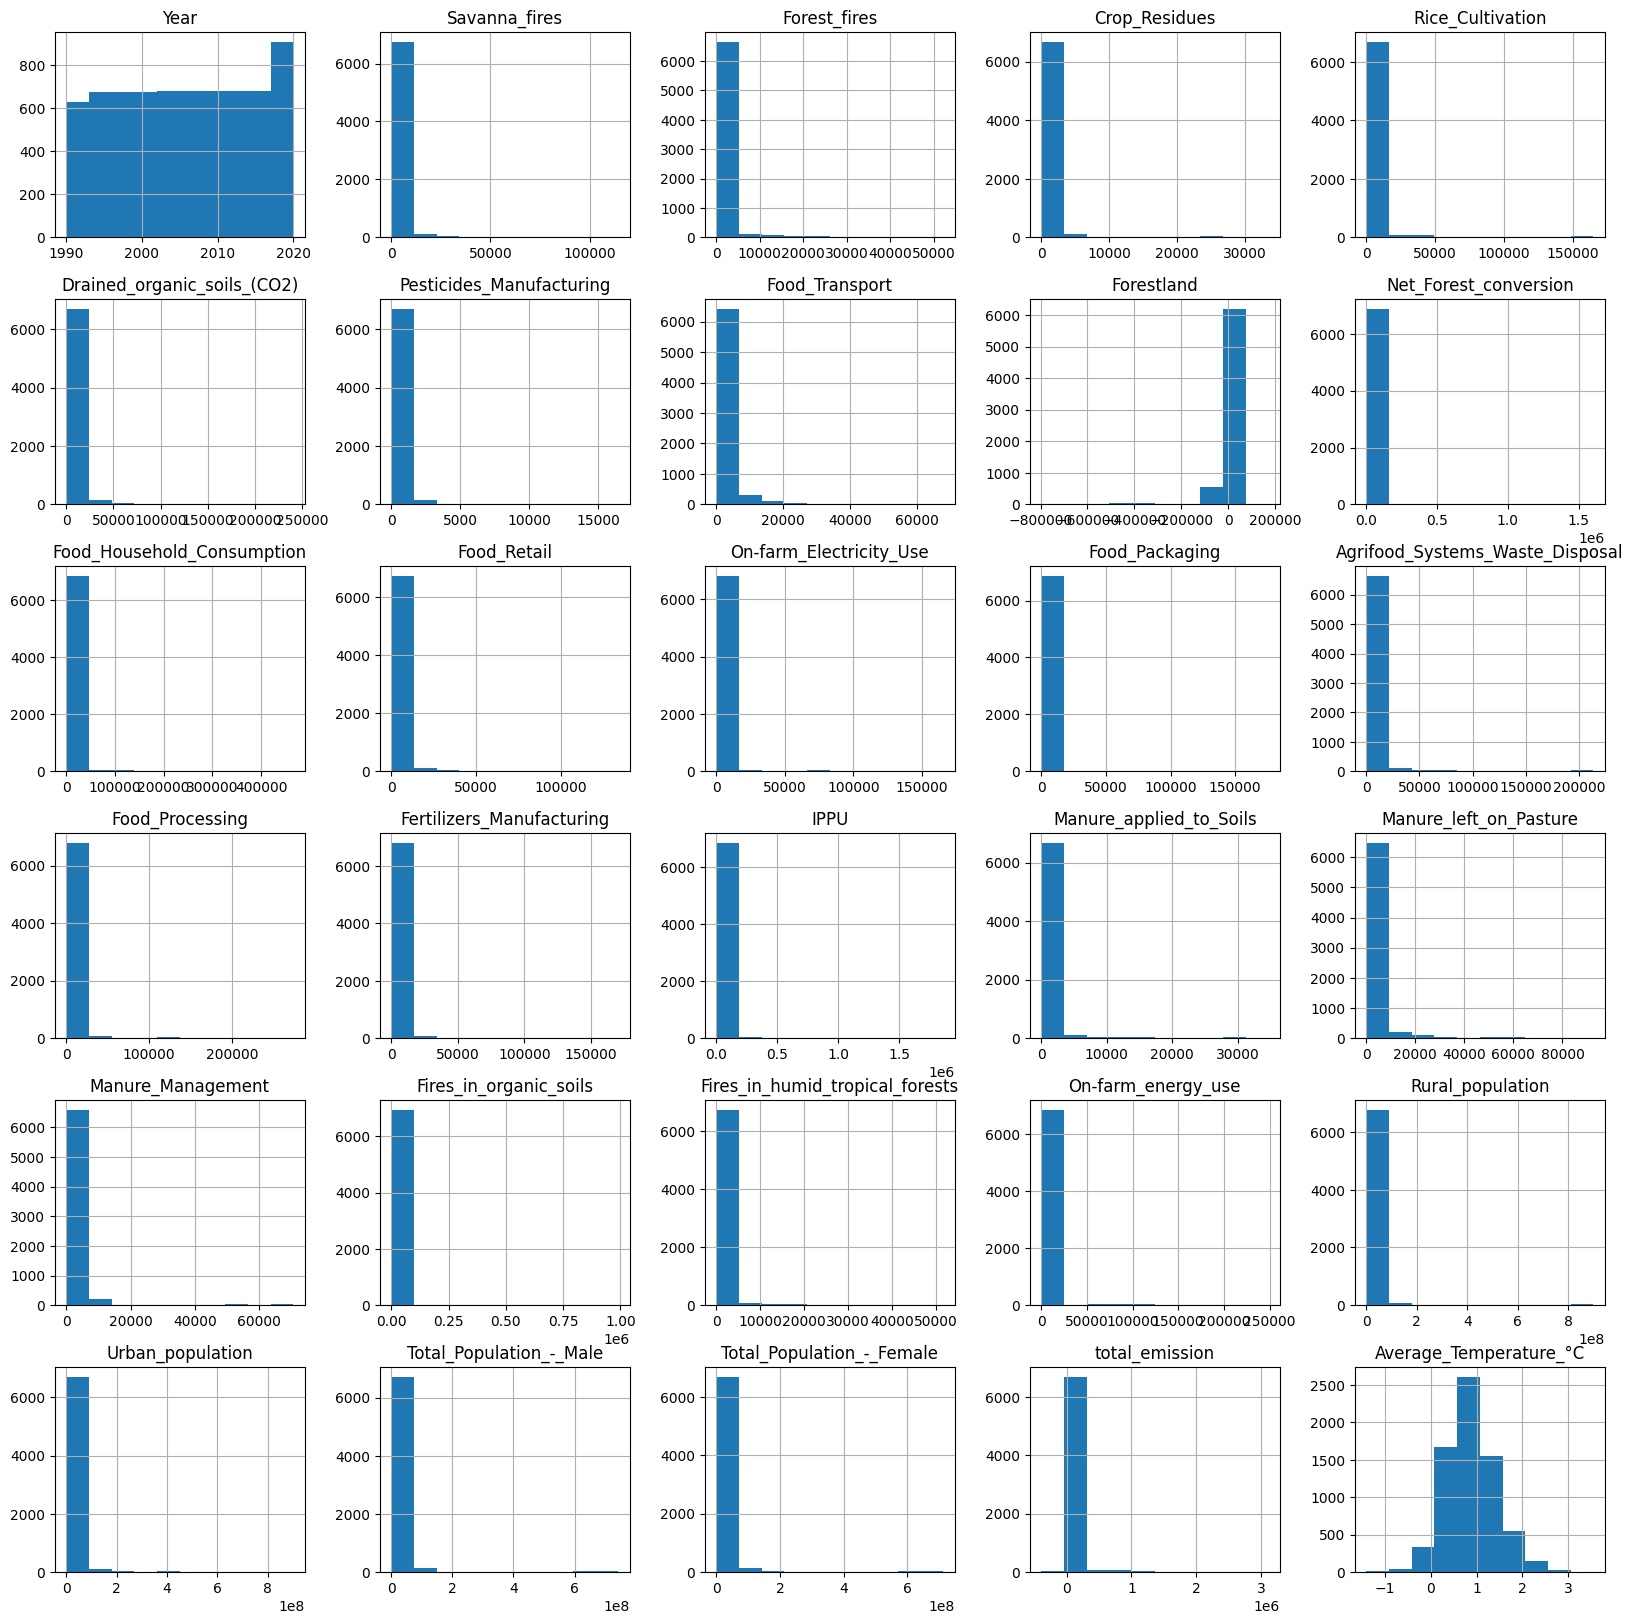

In [125]:
df.hist(figsize=(20, 20))

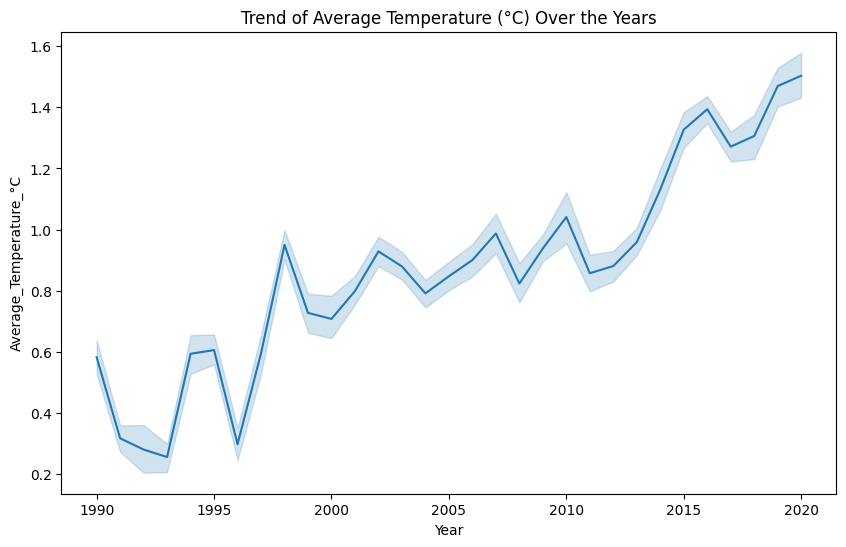

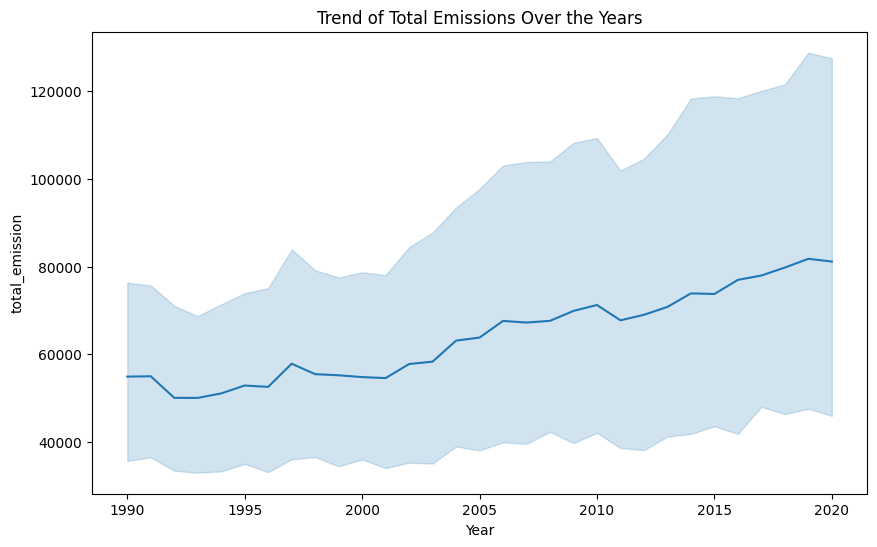

In [126]:
def line_graph(df, x, y, title):
    """
    The function receives a dataframe as the first argument followed by the independet variable x and column Y and
    the title of the graph to be plotted, the fuction use these arguments to plot a line graph
    """

    # Time Series Analysis - Trend Analysis
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=x, y=y, data=df)
    plt.title(title)
    plt.show()


line_graph(
    df,
    "Year",
    "Average_Temperature_°C",
    "Trend of Average Temperature (°C) Over the Years",
)

line_graph(df, "Year", "total_emission", "Trend of Total Emissions Over the Years")

The line graph of average temperatures by year clearly shows a rise from the 1990s to 2020, while the line graph of total emissions by year leaves no doubt that carbon dioxide emissions have steadily increased linearly over the years.


Correlation with Average_Temperature_°C :

 Average_Temperature_°C             1.000000
Year                               0.545932
Food_Transport                     0.075724
Food_Retail                        0.073404
IPPU                               0.062307
Food_Household_Consumption         0.055542
Food_Processing                    0.053083
Manure_applied_to_Soils            0.042268
Fertilizers_Manufacturing          0.041462
Food_Packaging                     0.040767
On-farm_energy_use                 0.039016
Urban_population                   0.036263
Manure_Management                  0.032698
Drained_organic_soils_(CO2)        0.029030
Pesticides_Manufacturing           0.027960
Crop_Residues                      0.025286
total_emission                     0.019043
On-farm_Electricity_Use            0.009081
Agrifood_Systems_Waste_Disposal    0.008995
Total_Population_-_Female          0.005456
Total_Population_-_Male            0.003623
Manure_left_on_Pasture          

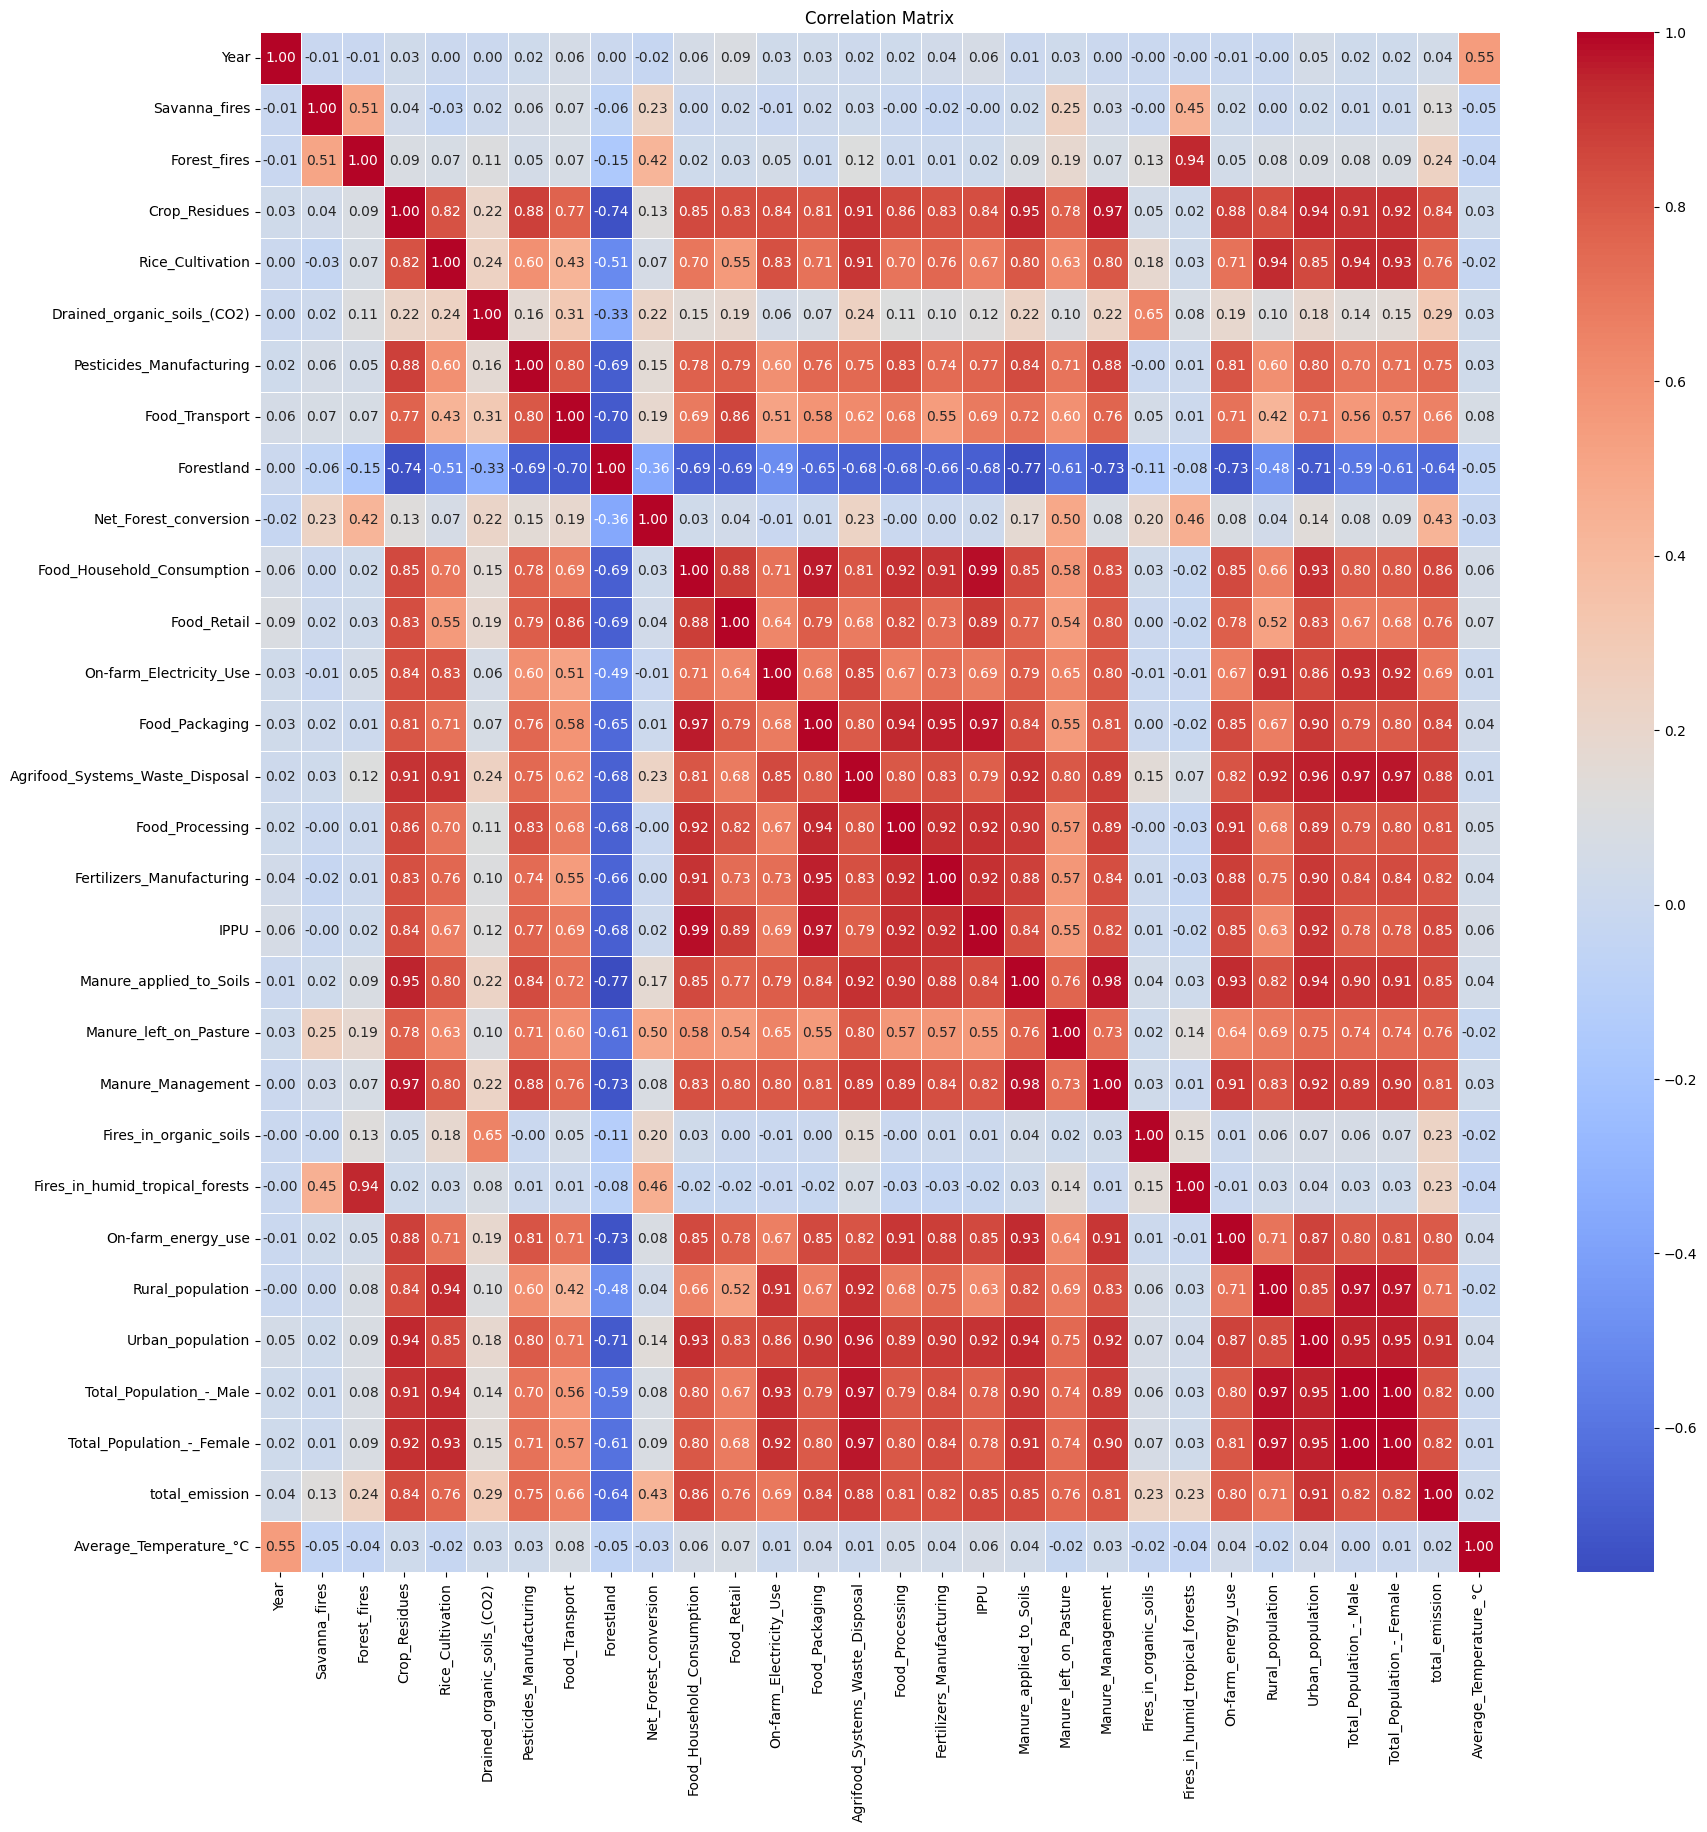

In [127]:
corr = df.drop("Area", axis=1).corr()
print("Correlation with Average_Temperature_°C :\n\n",
      corr["Average_Temperature_°C"].sort_values(ascending=False))

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


From the heat map, it is evident that there is a multilinear correlation between many variables, the squares appering in dark blue indicate a negative correlation whiile the squares appearing in dark red or meron indicate positive correlation. multilinear correlation is not good for a reggration model.  


Exploring the total emissions per year.

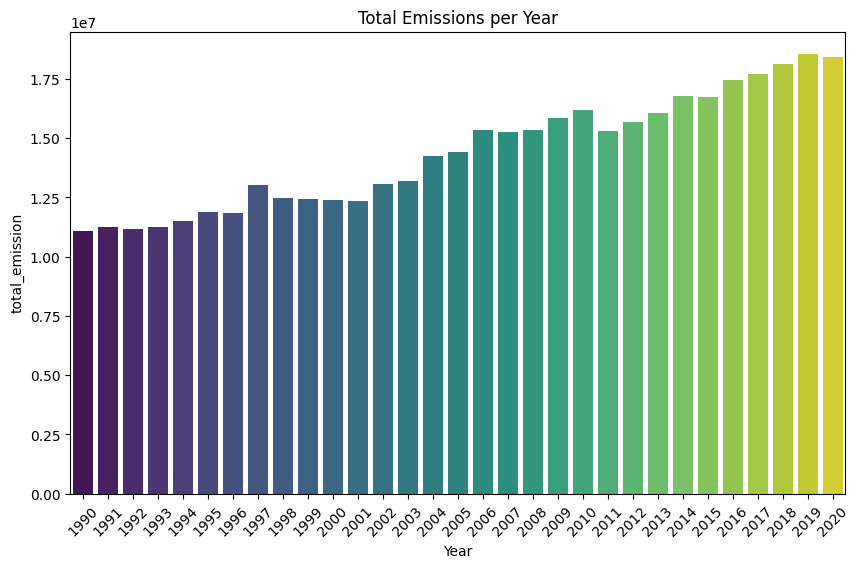

In [128]:
def bar_graph_plots(df, title, x, y):

    emissions_per_year = df.groupby(x)[y].sum().reset_index()

    # Plot the data using seaborn
    plt.figure(figsize=(10, 6))
    sns.barplot(x=x, y=y, data=emissions_per_year, palette="viridis")
    plt.xticks(rotation=45)
    plt.title(title)


bar_graph_plots(df, "Total Emissions per Year", "Year", "total_emission")

The bargraphs clearly indicate a rise in carbon dioxide emmissions since the year of 1990 to 2020


### Exploring Relationships between Variables

In this section, we visualize the relationships between the target variable and other features in the dataset. The target variable is defined as `"Average_Temperature_°C"`, while non-numeric features are labeled as `"Area"`. We aim to understand how each feature relates to the target variable through scatter plots.

Procedure Overview:

- **Data Setup**:
  - Identify the target variable and non-numeric features.
  - Calculate the number of numeric features to visualize.

- **Plotting**:
  - Determine the layout of subplots based on the number of features.
  - Iterate over each numeric feature:
    - Create a scatter plot between the feature and the target variable.
    - Set titles and labels for each subplot accordingly.

- **Display**:
  - Show the scatter plots in a grid layout.
  - Remove any empty subplots to enhance readability.

Visualization:

The generated scatter plots depict the relationships between `"Average_Temperature_°C"` and other numeric features in the dataset. Each subplot represents a scatter plot of the target variable against a specific feature.


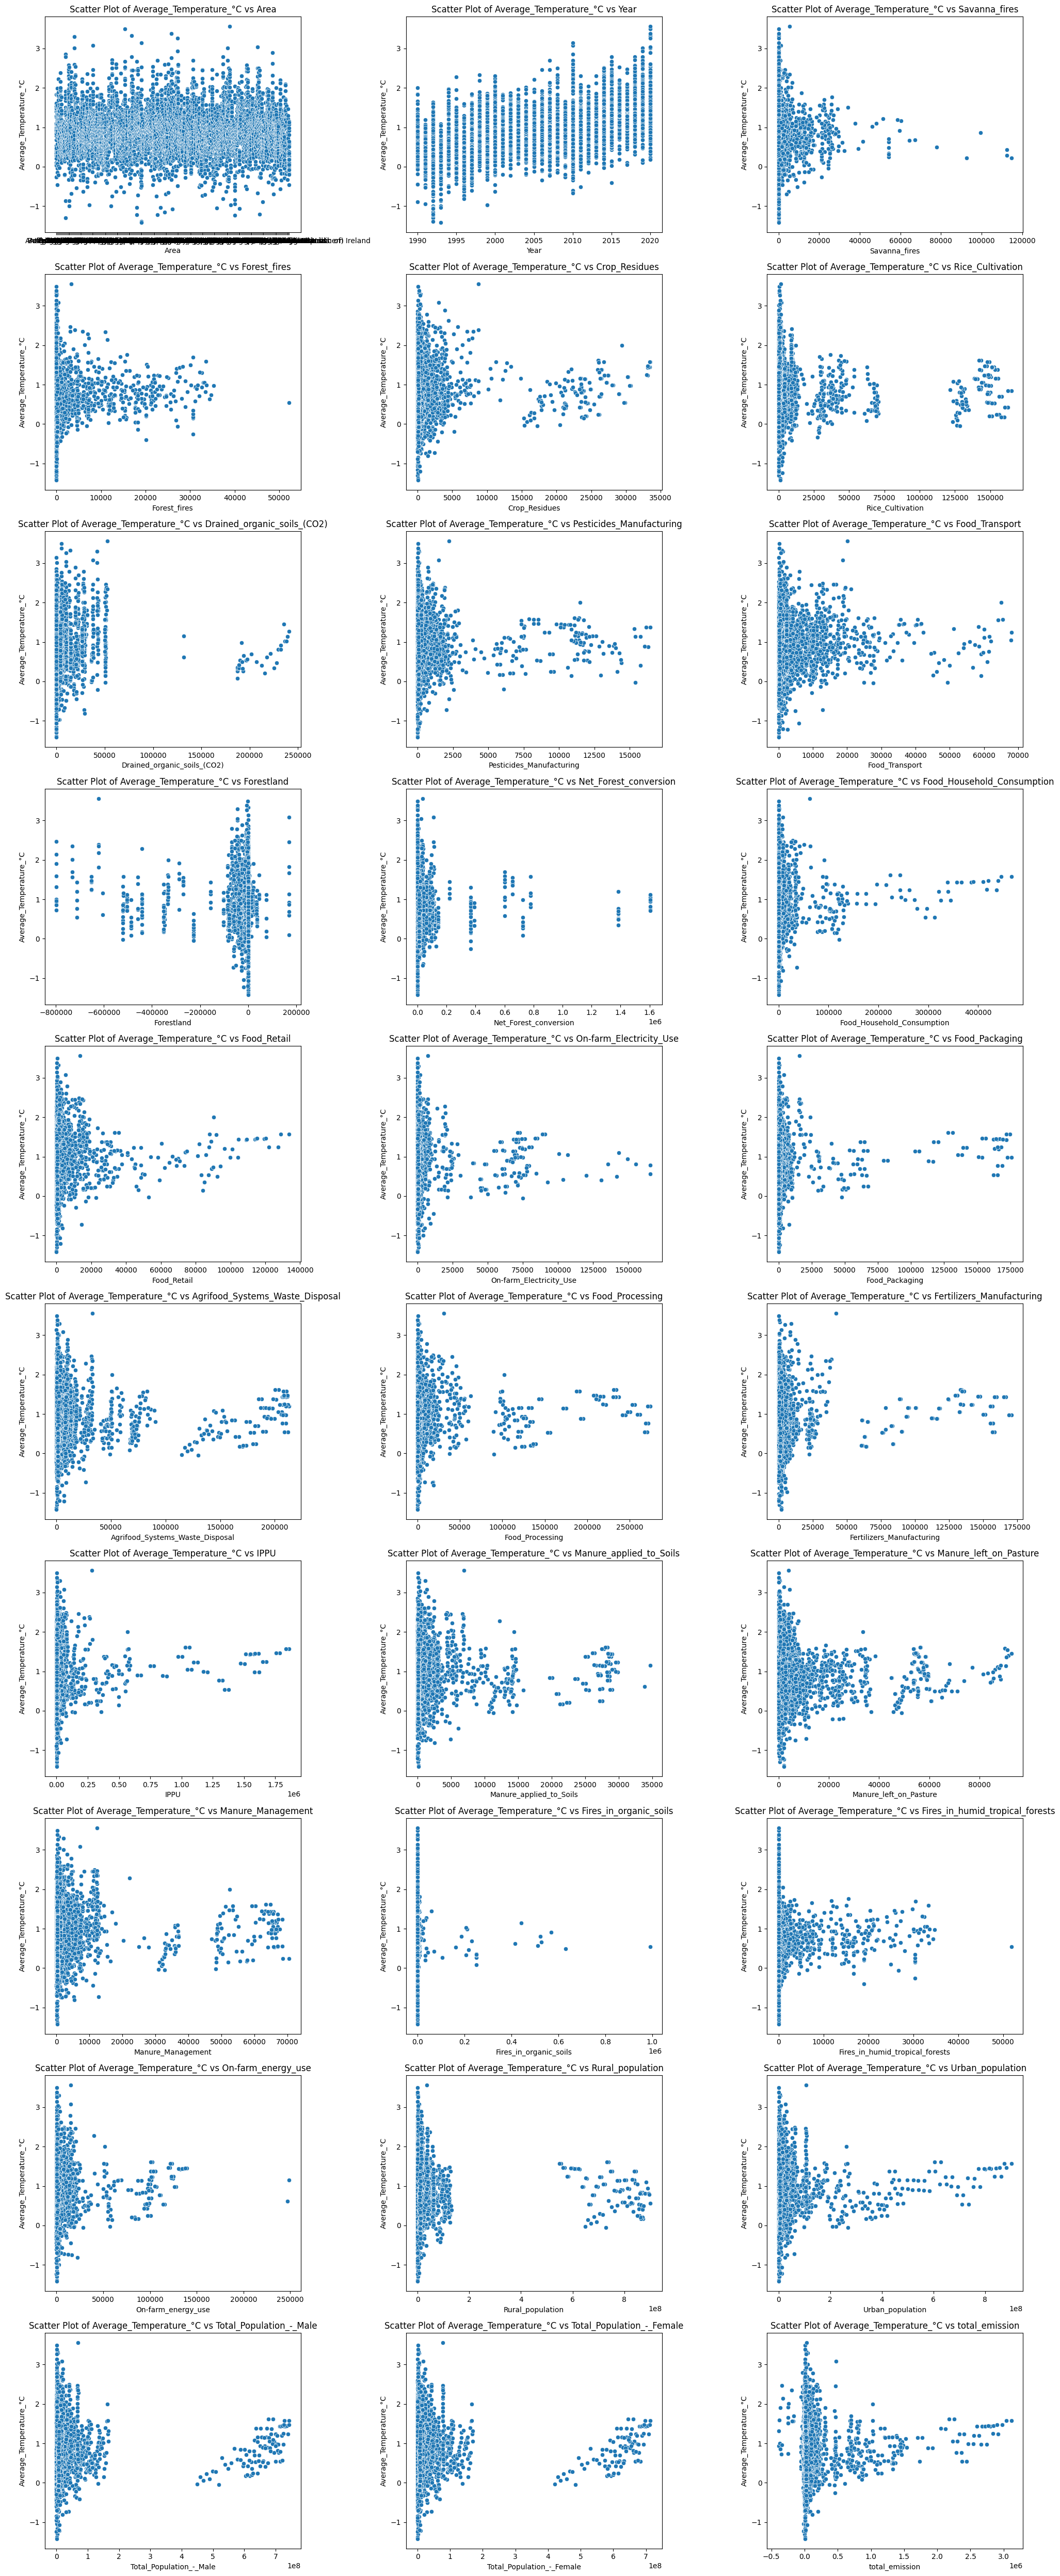

In [129]:
target_variable = "Average_Temperature_°C"
#non_num = "Area"

features = df.columns.drop([target_variable])
num_features = len(features)

# the number of rows and columns for the subplots
num_cols = 3  # e number of columns in the grid
num_rows = math.ceil(num_features / num_cols)

#  subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.scatterplot(x=feature, y=target_variable, data=df, ax=axes[i])
    axes[i].set_title(f"Scatter Plot of {target_variable} vs {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel(target_variable)

# Remove any empty subplots
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Most scatter plots are not showing a linear relationshiph between the dependent variable temperature and the other indipendent variables. 

Total Population by Gender

* In this section, we calculate and visualize the total population by gender using the provided dataset. The total male and female populations are computed separately, and then a bar graph is generated to illustrate the distribution.

* The resulting bar graph displays the total population categorized by gender. Each bar represents either male or female population, providing a clear comparison between the two categories.


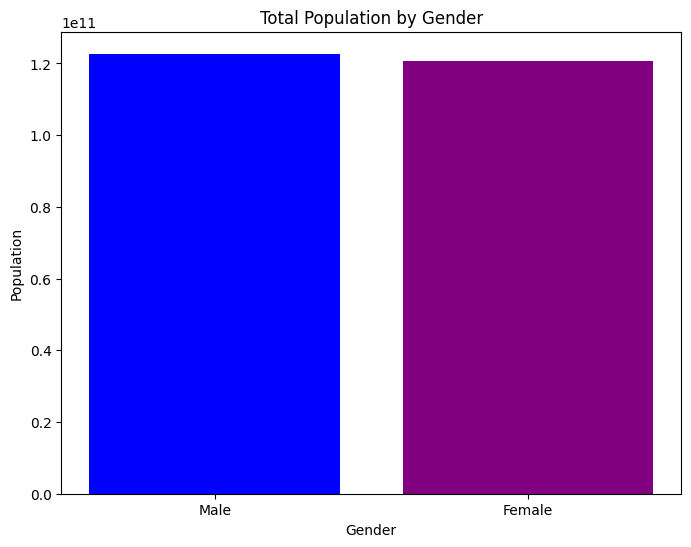

In [130]:
total_male_population = df['Total_Population_-_Male'].sum()
total_female_population = df['Total_Population_-_Female'].sum()

# Create a DataFrame for plotting
data = {
    'Gender': ['Male', 'Female'],
    'Population': [total_male_population, total_female_population]
}
population_df = pd.DataFrame(data)

# Plotting the bar graph
plt.figure(figsize=(8, 6))
plt.bar(population_df['Gender'], population_df['Population'], color=['blue', 'purple'])
plt.title('Total Population by Gender')
plt.xlabel('Gender')
plt.ylabel('Population')
plt.show()

The visual shows that males are slightly higher than females.

## Preprocessing

Prepares dataset for regression by selecting predictor variables and target variable.


In [131]:
X = df.drop(['Average_Temperature_°C','Area'], axis= 1)
y = df['Average_Temperature_°C']

Feature Selection using VIF

VIF (Variance Inflation Factor) was utilized for feature selection.

 Why VIF?

- **Identifies Multicollinearity**: VIF helps in detecting multicollinearity among features. Multicollinearity inflates the variance of coefficient estimates.

- **Indicates Feature Correlation**: High VIF values signify strong correlation among features. Features with high VIF may be redundant.

- **Improves Model Interpretability**: Removing redundant features enhances model interpretability and reduces the risk of overfitting.

 Conclusion:

VIF serves as a valuable tool for identifying and removing redundant features.

The following function calculates the VIF (Variance Inflation Factor) for each feature in the dataset.


In [132]:
def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    # Sorting by VIF in descending order
    vif = vif.sort_values(by='VIF', ascending=False).reset_index(drop=True)

    return vif

calc_vif(X)


variables            VIF
0                    total_emission  432699.347293
1                              IPPU   88392.154797
2             Net_Forest_conversion   75468.543706
3                        Forestland   50150.220642
4         Total_Population_-_Female   10921.109604
5           Total_Population_-_Male    9865.727001
6        Food_Household_Consumption    5015.632768
7   Agrifood_Systems_Waste_Disposal    4145.739637
8            Fires_in_organic_soils    3963.035278
9                   Food_Processing    3170.286706
10                 Rice_Cultivation    2459.809486
11      Drained_organic_soils_(CO2)    2039.432396
12                 Rural_population    1202.082540
13               On-farm_energy_use    1155.328171
14        Fertilizers_Manufacturing    1101.147795
15                   Food_Packaging    1080.726702
16                 Urban_population     892.482348
17           Manure_left_on_Pasture     712.158575
18          On-farm_Electricity_Use     689.202323
19                Manure_Management     634.781837
20                      Food_Retail     598.450958
21                   Food_Transport     275.318983
22                    Savanna_fires     228.367573
23          Manure_applied_to_Soils     207.523263
24                    Crop_Residues     144.799614
25                     Forest_fires     126.256216
26  Fires_in_humid_tropical_forests      92.386518
27         Pesticides_Manufacturing      28.954354
28                             Year       2.081795

e.g Variables with extremely high VIFs:

* total_emission (VIF: 432699.35)
* IPPU (VIF: 88392.15)
* Net_Forest_conversion (VIF: 75468.54)
* Forestland (VIF: 50150.22)

These variables are highly collinear with each other and likely with other population-related variables. Including all these in the model would cause severe multicollinearity issues.


Drop features with High VIF

In [133]:
df_new = df.drop(columns=['Total_Population_-_Female','Total_Population_-_Male', 'Food_Household_Consumption', 'Food_Retail', 'On-farm_energy_use',
                          'Pesticides_Manufacturing','Crop_Residues','Forest_fires','Agrifood_Systems_Waste_Disposal'])

Data Encoding:

In [134]:
df_dumies = pd.get_dummies(df_new, drop_first= True)
print(df_dumies.shape)

df_1 = df_dumies.copy()

(6965, 256)


Split dataset

In this section, the dataset is split into training and testing sets for model evaluation. The predictor variables (`X`) are separated from the target variable (`y`). The training set comprises 80% of the data, while the remaining 20% is allocated to the testing set. This ensures that the model is trained on a subset of the data and evaluated on unseen data, providing insights into its generalization performance.


In [136]:
X = df_1.drop('Average_Temperature_°C', axis= 1)
y = df_1['Average_Temperature_°C']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                    random_state=42)

## Model Building

### **Extreme Gradient Boosting(XGBoost)**

**Pipeline**: We use Pipeline from scikit-learn to combine the StandardScaler and the XGBoost model. This ensures that scaling is applied as part of the cross-validation process, preventing data leakage.

In [137]:
# Define the model and the scaler in a pipeline
pipeline_xg = Pipeline([
    ('scaler', StandardScaler()),     # Step 1: Scaling
    ('xgb', xgb.XGBRegressor(random_state = 42))       # Step 2: XGBoost Model
])

Why XGBoost?:
- It utilizes decision trees as base learners and employs regularization techniques to enhance model generalization.
-  Itncludes built-in regularization techniques such as L1 (Lasso) and L2 (Ridge) regularization, which help prevent overfitting and improve generalization performance.
- Also Known for its computational efficiency, feature importance analysis, and handling of missing values


**XGBoost Hyperparameter optimization:**


In [138]:
param_dist_xg = {
    'xgb__learning_rate' : uniform(0.01, 0.1),
    'xgb__max_depth': randint(3, 10),
    'xgb__min_child_weight': randint(1, 6),
    'xgb__subsample': uniform(0.5, 1.0),
    'xgb__colsample_bytree': uniform(0.5, 1.0),
    'xgb__alpha': [0, 0.5, 1], #L1 regularization
    'xgb__lambda': [1, 1.5, 2], #L2 regularization
    'xgb__n_estimators': randint(100, 500)
}

# Set up the randomized search with cross-validation
random_search = RandomizedSearchCV(estimator=pipeline_xg, param_distributions=param_dist_xg,
                                   n_iter=60, scoring='neg_mean_squared_error',
                                   cv=5, verbose=1, random_state=42)

random_search.fit(X_train, y_train)
# Get the best parameters
best_params_xg = random_search.best_params_

print("Best parameters found: ", best_params_xg)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters found:  {'xgb__alpha': 0, 'xgb__colsample_bytree': 0.7715429158197419, 'xgb__lambda': 1, 'xgb__learning_rate': 0.055726516161372856, 'xgb__max_depth': 8, 'xgb__min_child_weight': 5, 'xgb__n_estimators': 471, 'xgb__subsample': 0.9113539050566786}


Train Model and Predict

In [139]:
# Train the final model using the best parameters
final_XGB_model = random_search.best_estimator_

final_XGB_model.fit(X_train, y_train)

y_pred_xg = final_XGB_model.predict(X_test)

rmse_XGB = np.sqrt(mean_squared_error(y_test, y_pred_xg))
r2_XGB = r2_score(y_test, y_pred_xg)
mae_XGB = mean_absolute_error(y_test, y_pred_xg)

print("RMSE: ", rmse_XGB)
print("MAE: ", mae_XGB)
print("R-squared: ", r2_XGB)

RMSE:  0.3178468763839353
MAE:  0.23381757044246881
R-squared:  0.670461908986622


### Results Interpretation of XGBoost


* RMSE (Root Mean Squared Error): A value of 0.3178 means our predictions are typically about 0.32 degrees Celsius away from the actual temperatures.

* MAE (Mean Absolute Error): With an MAE of 0.2338, our model's predictions are typically around 0.23 degrees Celsius off from the actual temperatures.

* R-squared: An R-squared of 0.6705 indicates that our model can explain around 67% of the variability in temperatures using the provided data.

Plot Predictions

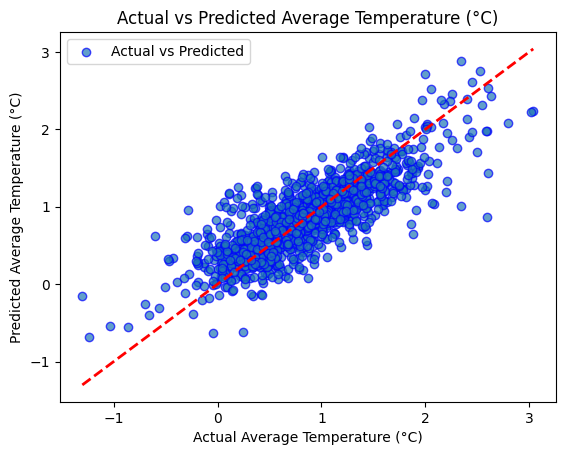

In [140]:
# Plot the results
plt.scatter(y_test, y_pred_xg, alpha=0.7, edgecolors='b', label='Actual vs Predicted')  # Plot actual vs predicted
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color = "red")  # Plot the diagonal line
plt.xlabel('Actual Average Temperature (°C)')
plt.ylabel('Predicted Average Temperature (°C)')
plt.title('Actual vs Predicted Average Temperature (°C)')
plt.legend()
plt.show()

Summary Interpretation of Scatter Plot: Actual vs Predicted Emissions

The fact that the points are evenly distributed around the red diagonal line indicates that the predicted temperatures are generally close to the actual temperatures despite a few points being a litte bit off away from the red line. This suggests that the model is performing well and making accurate predictions across the range of temperatures.

Examine feature importances

This code cell calculates and displays the importance of each feature in the model's predictions. By examining feature importance, we can understand which input variables (features) have the most significant impact on predicting emissions. This insight helps us identify the key factors influencing emissions levels, providing valuable information for decision-making and further analysis.



In [141]:
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': final_XGB_model['xgb'].feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances.head(10))

                                               Feature  Importance
61                                          Area_Chile    0.035569
0                                                 Year    0.034675
138                                       Area_Liberia    0.023173
196  Area_Saint Helena, Ascension and Tristan da Cunha    0.017979
46                                       Area_Botswana    0.017743
15                              Fires_in_organic_soils    0.017305
16                     Fires_in_humid_tropical_forests    0.016898
157                                      Area_Mongolia    0.016506
149                              Area_Marshall Islands    0.015954
146                                      Area_Maldives    0.015538


In [142]:
filtered_features = feature_importances[feature_importances['Importance'] > 0]

# Display the filtered features
print(filtered_features)

                                               Feature  Importance
61                                          Area_Chile    0.035569
0                                                 Year    0.034675
138                                       Area_Liberia    0.023173
196  Area_Saint Helena, Ascension and Tristan da Cunha    0.017979
46                                       Area_Botswana    0.017743
..                                                 ...         ...
187                                        Area_Poland    0.000651
217                                         Area_Spain    0.000650
62                                          Area_China    0.000611
237                                        Area_Uganda    0.000596
175                      Area_Northern Mariana Islands    0.000586

[185 rows x 2 columns]



The importance values indicate the relative contribution of each feature to the model's predictions. For instance, a feature with an importance of 0.0356 (like Area_Chile) is deemed to have a stronger influence on predicting average temperature compared to features with lower importance values.

In [143]:
filtered_feature_names = filtered_features['Feature'].tolist()



Analysis of Prediction Discrepancies.

This code cell creates a DataFrame to compare the actual emissions values with the predicted emissions values generated by the model. It then sorts the DataFrame based on the difference between the actual and predicted values in descending order. This analysis helps identify instances where the model's predictions deviate the most from the actual values, providing insights into potential areas for model improvement or data exploration.



In [144]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred_xg,'Difference':y_test-y_pred_xg})
pred_df.sort_values('Difference',ascending= False)

Actual Value  Predicted Value  Difference
3289      2.597833         0.868398    1.729435
4852      2.346500         1.009403    1.337097
5755      1.884917         0.644591    1.240325
3411      2.600583         1.436041    1.164542
6707      1.858250         0.780719    1.077531
...            ...              ...         ...
2299      0.200000         1.250538   -1.050538
1617      0.110500         1.173661   -1.063161
279      -1.302417        -0.151305   -1.151111
4728     -0.602333         0.626086   -1.228419
6549     -0.287000         0.951922   -1.238922

[1393 rows x 3 columns]

 Visualizing Feature Importances

This code cell generates a bar plot to visualize the feature importances of the model. It excludes features that start with "Area" to focus on other relevant factors influencing temperature prediction. The plot helps identify the most significant features contributing to the model's predictions, providing valuable insights for understanding the underlying factors driving emissions levels.

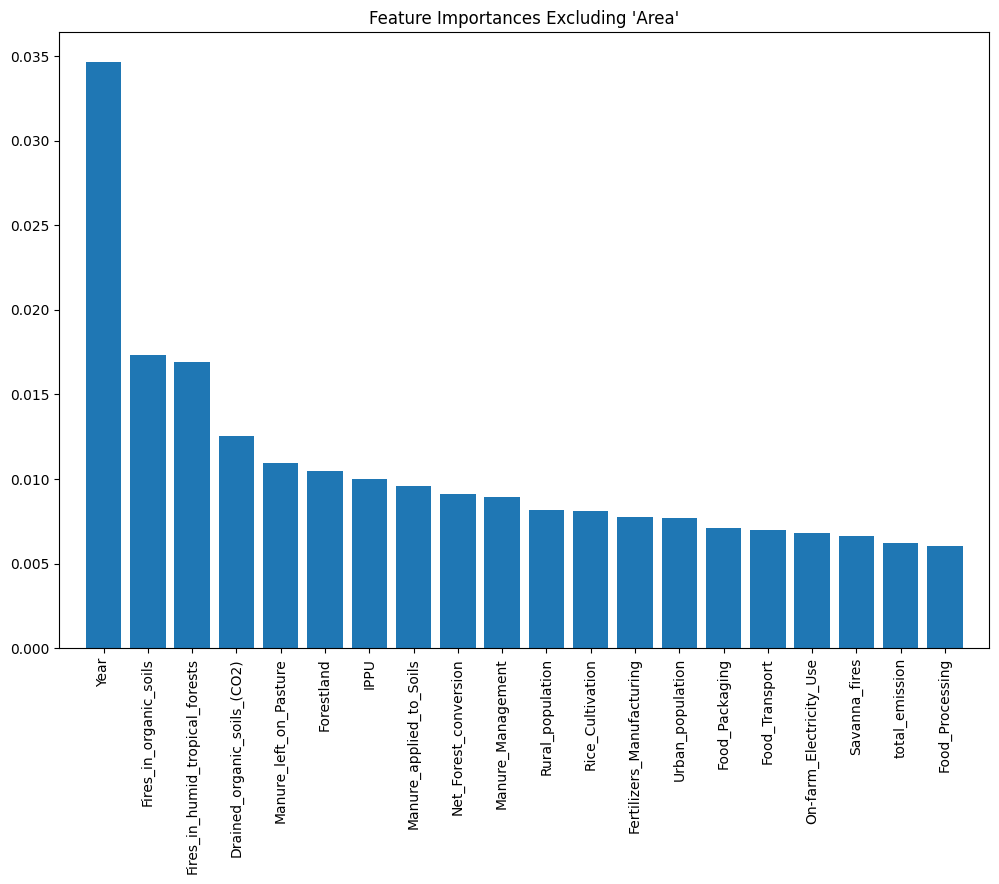

In [145]:
importances = final_XGB_model['xgb'].feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_train.columns
# Filter out features that start with "Area"
filtered_indices = [i for i, name in enumerate(feature_names) if not name.startswith("Area")]
filtered_importances = importances[filtered_indices]
filtered_feature_names = feature_names[filtered_indices]

# Sort the remaining features by their importance
sorted_indices = np.argsort(filtered_importances)[::-1]

# Plot the feature importances excluding those that start with "Area"
plt.figure(figsize=(12, 8))
plt.title("Feature Importances Excluding 'Area'")
plt.bar(range(len(filtered_feature_names)), filtered_importances[sorted_indices], align="center")
plt.xticks(range(len(filtered_feature_names)), filtered_feature_names[sorted_indices], rotation=90)
plt.xlim([-1, len(filtered_feature_names)])
plt.show()


In summary, the descending bars provide a clear indication of the relative importance of each feature, enabling stakeholders to gain valuable insights into the factors influencing emissions prediction and guiding decision-making processes.


Analyzing Residuals with XGBoost Model

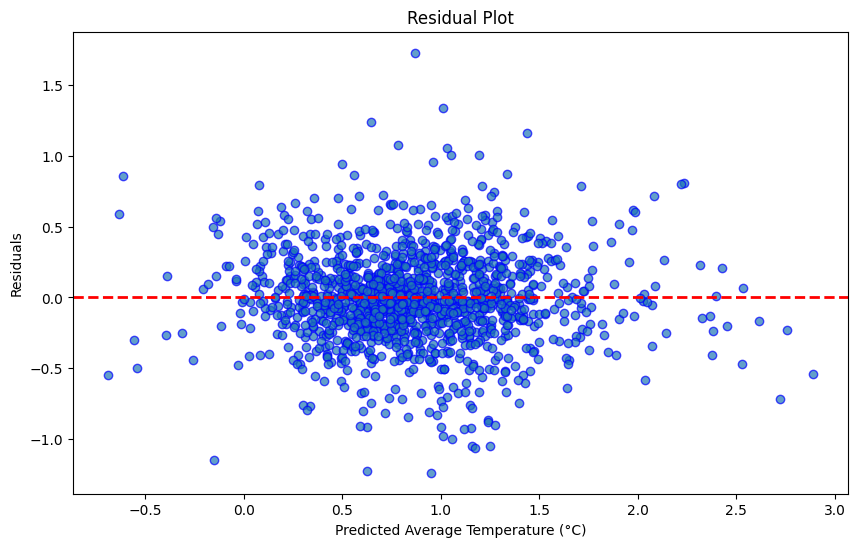

In [146]:
residuals = y_test - y_pred_xg

# Create a residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_xg, residuals, alpha=0.7, edgecolors='b')
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.xlabel('Predicted Average Temperature (°C)')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

The line shows that there is a hard upper bound on median home price. So perhaps the data refer only to blocks where the median is less than a certain value

Regarding the linear pattern: this happens frequently when your response takes the same value for a number of observations. For those observations, (y−pred)
 is of course a linear function of pred
, as y
 is constant.

Summary of Residual Analysis.

The residual plot reveals that the residuals, representing the differences between actual and predicted total emissions values, are evenly scattered around the red line. This indicates that the XGBoost model's predictions are unbiased and accurate across the entire range of emissions values. The consistent and uniform distribution of residuals validates the model's effectiveness in capturing the underlying relationships and provides confidence in its reliability for making accurate estimates of emissions levels.

## **Bagging regressor**

Why Bagging:

- BaggingRegressor is a machine learning ensemble method that combines the predictions from multiple base estimators, typically decision trees, to improve overall prediction accuracy.

- Reduction of Variance: BaggingRegressor reduces the variance of the model by averaging the predictions of multiple base estimators trained on different subsets of the training data. This helps to mitigate overfitting and improve the model's generalization performance.
- Robustness to Outliers and Noise: By training multiple base estimators on different subsets of the data


In [147]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
# Define the model and the scaler in a pipeline
pipeline_bag = Pipeline([
    ('scaler', StandardScaler()),     # Step 1: Scaling
    ('bagging', BaggingRegressor(estimator=DecisionTreeRegressor()))       # Step 2: XGBoost Model
])

Hyperparameter Tuning for BaggingRegressor

This code cell focuses on optimizing the BaggingRegressor model through hyperparameter tuning using Randomized Search Cross Validation. Here's what the process entails:

- **Parameter Space Definition:** The cell establishes a parameter space to explore optimal hyperparameters. This space includes parameters like the number of estimators, maximum samples, maximum features, maximum depth, minimum samples split, and minimum samples leaf.

- **Randomized Search Cross Validation:** Leveraging Randomized Search Cross Validation, the code efficiently navigates the parameter space to identify the most effective combination of hyperparameters. This technique aids in finding optimal configurations while balancing computational resources.

- **Best Parameter Identification:** Upon completion of the search, the cell outputs the best parameters discovered during the process. These parameters serve as the blueprint for configuring the BaggingRegressor model to achieve peak performance, ensuring robustness and accuracy in its predictions.


In [148]:
param_dist_bag = {
    'bagging__n_estimators': randint(10, 200),       # Number of base estimators in the ensemble
    'bagging__max_samples': uniform(0.5, 0.5),       # Fraction of samples to draw from X to train each base estimator
    'bagging__max_features': uniform(0.5, 0.5),      # Fraction of features to draw from X to train each base estimator
    'bagging__estimator__max_depth': randint(3, 20),  # Maximum depth of the base estimator (DecisionTreeRegressor)
    'bagging__estimator__min_samples_split': randint(2, 20),  # Minimum number of samples required to split an internal node
    'bagging__estimator__min_samples_leaf': randint(1, 20)    # Minimum number of samples required to be at a leaf node
}

            # Set up the randomized search with cross-validation
random_search_bag = RandomizedSearchCV(estimator=pipeline_bag, param_distributions=param_dist_bag,
                                   n_iter=50, scoring='neg_mean_squared_error',
                                   cv=5, verbose=1, random_state=42)  # n_itter =50/40 :RMSE:  18177.7186755697 R-squared:  0.9952231823705947

random_search_bag.fit(X_train, y_train)
# Get the best parameters
best_params_bag = random_search_bag.best_params_

print("Best parameters found: ", best_params_bag)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found:  {'bagging__estimator__max_depth': 19, 'bagging__estimator__min_samples_leaf': 6, 'bagging__estimator__min_samples_split': 6, 'bagging__max_features': 0.8161529152967897, 'bagging__max_samples': 0.8167648553804474, 'bagging__n_estimators': 148}


Training the Final BaggingRegressor Model

This code cell trains the final BaggingRegressor model using the best parameters obtained from the hyperparameter tuning process.



In [149]:
# Train the final model using the best parameters
final_bag_model = random_search_bag.best_estimator_  # OLD: RMSE:  40958.861587016196 #R-squared:  0.9757475476519069

final_bag_model.fit(X_train, y_train)

y_pred_bag  = final_bag_model.predict(X_test)

rmse_bag = np.sqrt(mean_squared_error(y_test, y_pred_bag))
r2_bag = r2_score(y_test, y_pred_bag)
mae_bag = mean_absolute_error(y_test, y_pred_bag)

print("RMSE: ", rmse_bag)
print("MAE: ", mae_bag)
print("R-squared: ", r2_bag)

RMSE:  0.3370278257179784
MAE:  0.2482612857961551
R-squared:  0.629488883106697



### Results Interpretation of BaggingRegressor:

* RMSE (Root Mean Squared Error): The RMSE of 0.3370 indicates that, on average, our model's predictions are approximately 0.34 units away from the actual values.

* MAE (Mean Absolute Error): With an MAE of 0.2483, the average error between our model's predictions and the actual values is around 0.25 units.

* R-squared: The R-squared value of 0.6295 suggests that our model can explain approximately 63% of the variability in the data.
  
Conclusion 
* The first model (XGBoost) outperforms the second model (Bagging) with lower RMSE(0.3178) and MAE(0.2338) values and a slightly higher R-squared(0.6705) value, indicating better accuracy and explanatory power.

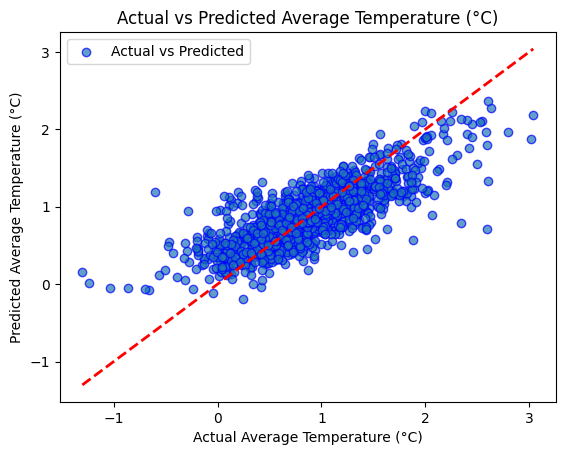

In [150]:
# Plot the results
plt.scatter(y_test, y_pred_bag, alpha=0.7, edgecolors='b', label='Actual vs Predicted')  # Plot actual vs predicted
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color = "red")  # Plot the diagonal line
plt.xlabel('Actual Average Temperature (°C)')
plt.ylabel('Predicted Average Temperature (°C)')
plt.title('Actual vs Predicted Average Temperature (°C)')
plt.legend()
plt.show()

From the plot, it seems like the Bagging model's predictions are evenly distributed around the diagonal line, but it still doesn't perform better than the XGBoost model.



Comparison of Actual and Predicted Emissions
This code cell creates a DataFrame to compare the actual emissions values with the predicted emissions values generated by the model. It then sorts the DataFrame based on the difference between the actual and predicted values, allowing us to identify instances where the model's predictions deviate the most from the actual values.

In [151]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred_bag,'Difference':y_test-y_pred_bag})
pred_df.sort_values('Difference',ascending= False)

Actual Value  Predicted Value  Difference
3289      2.597833         0.708820    1.889013
4852      2.346500         0.785828    1.560672
5755      1.884917         0.572562    1.312355
3411      2.600583         1.334131    1.266452
3624      2.062667         0.899587    1.163080
...            ...              ...         ...
5038      0.058917         1.137056   -1.078139
6549     -0.287000         0.948218   -1.235218
5388     -1.236250         0.015965   -1.252215
279      -1.302417         0.152027   -1.454444
4728     -0.602333         1.193012   -1.795345

[1393 rows x 3 columns]

Visualization: Bagging Residual Plot

This code cell generates a residual plot to analyze the differences between the actual total emissions values (`y_test`) and the predicted total emissions values (`y_pred_bag`) generated by the BaggingRegressor model. Key points include:


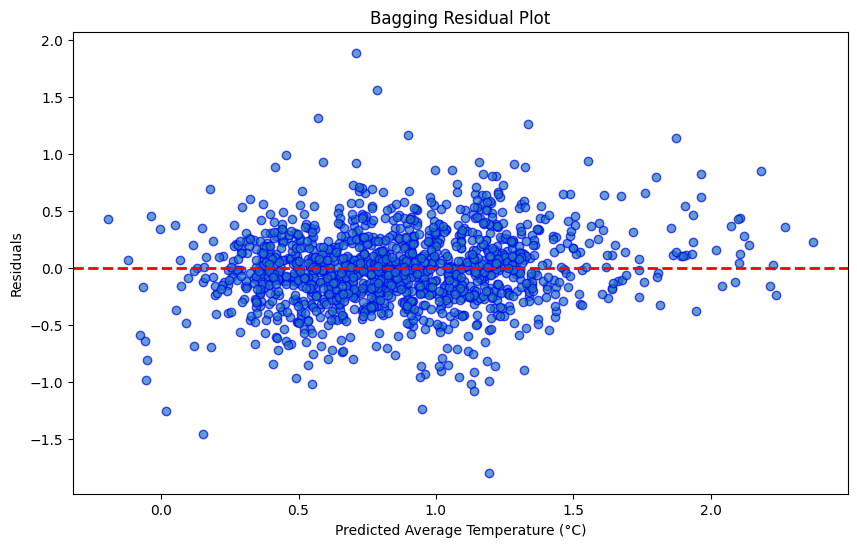

In [152]:
residuals_bag = y_test - y_pred_bag

# Create a residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_bag, residuals_bag, alpha=0.7, edgecolors='b')
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.xlabel('Predicted Average Temperature (°C)')
plt.ylabel('Residuals')
plt.title('Bagging Residual Plot')
plt.show()

Summary of Bagging Residual Plot

The residual plot displays the differences between the actual and predicted total emissions values generated by the BaggingRegressor model. Key observations include:

- **Even Distribution:** The scatter points are evenly distributed around the horizontal dashed red line at y=0. This indicates that, on average, the model's predictions are unbiased, with an equal number of overestimations and underestimations across the range of actual emissions values.

- **Absence of Patterns:** The lack of discernible patterns in the distribution of residuals suggests that the model's predictions exhibit randomness and do not display systematic errors or biases. This indicates that the BaggingRegressor model effectively captures the underlying relationships between input features and total emissions values.

Overall, the evenly distributed scatter points around the zero line in the residual plot affirm the accuracy and reliability of the BaggingRegressor model in predicting total emissions values without exhibiting any systematic errors or biases.

## **Stacking Ensemble Models**
Why Stacking?

- Stacking is an ensemble learning technique that combines multiple base models, or learners, to improve predictive performance. In stacking, the predictions of individual base models are used as features to train a meta-model, also known as a blender or a meta-learner

- Improved Predictive Performance: Stacking can often lead to better predictive performance compared to individual base models.

- Reduction of Overfitting: Stacking helps mitigate overfitting by combining predictions from multiple models.

- Model Flexibility: Stacking allows for flexibility in model selection. You can choose different types of base models and meta-learners based on the problem at hand.
- Ensemble Diversity:This diversity helps capture different aspects of the data and reduces the risk of model bias.



##### Pipeline Definition for Base Estimators



This code defines pipelines for three base estimators:

- Linear Regression (`pipe_lr`)
- Decision Tree Regressor (`pipe_dt`)
- Ridge Regression (`pipe_ridge`)

Each pipeline includes feature scaling and applies a specific regression model, streamlining the preprocessing and modeling steps.




In [153]:
# Define pipelines for each base estimator
pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])

pipe_dt = Pipeline([
    ('scaler', StandardScaler()),
    ('dt', DecisionTreeRegressor(random_state=42))
])

pipe_ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

Ridge Regression (pipe_ridge): incorporates L2 regularization to prevent overfitting. It is particularly useful when dealing with multicollinearity in the data and can improve the stability of the stacking model. which is good for our data.

##### Meta-Learner Definition and StackingRegressor Creation

This code snippet defines a meta-learner and creates a StackingRegressor ensemble model:

- **Meta-Learner:**
  - A `LinearRegression()` model is specified as the meta-learner (`meta_learner_reg`).

- **StackingRegressor Creation:**
  - A StackingRegressor (`s_reg`) is instantiated with:
    - Base estimators: Linear Regression (`pipe_lr`), Decision Tree Regressor (`pipe_dt`), and Ridge Regression (`pipe_ridge`).
    - Final estimator: The specified meta-learner (`meta_learner_reg`).


In [154]:
# Define the meta-learner
meta_learner_reg = LinearRegression()


# Create the StackingRegressor
s_reg = StackingRegressor(
    estimators=[("LR", pipe_lr), ("DT", pipe_dt), ("Ridge", pipe_ridge)],
    final_estimator=meta_learner_reg
)

Tuning for StackingRegressor

This code sets up hyperparameter distributions and performs randomized search cross-validation to optimize the StackingRegressor model.


In [155]:
# Define the hyperparameter distributions
param_dist_stack = {
    'DT__dt__max_depth': randint(3, 20),
    'DT__dt__min_samples_split': randint(2, 20),
    'DT__dt__min_samples_leaf': randint(1, 20),
    'Ridge__ridge__alpha': uniform(0.1, 10.0)
}

# Set up the randomized search with cross-validation
random_search_stack = RandomizedSearchCV(estimator=s_reg, param_distributions=param_dist_stack,
                                   n_iter=50, scoring='neg_mean_squared_error',
                                   cv=5, verbose=1, random_state=42)

# Fit the model
random_search_stack.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=StackingRegressor(estimators=[('LR',
                                                            Pipeline(steps=[('scaler',
                                                                             StandardScaler()),
                                                                            ('lr',
                                                                             LinearRegression())])),
                                                           ('DT',
                                                            Pipeline(steps=[('scaler',
                                                                             StandardScaler()),
                                                                            ('dt',
                                                                             DecisionTreeRegressor(random_state=42))])),
                                                           ('Ridge',
                                                            Pipeline(steps=[('scaler',
                                                                             StandardScaler()),
                                                                            ('ridge',
                                                                             Ridge())]))],
                                               final_estimator=LinearRegression(...
                                        'DT__dt__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000025D0E4BCDD0>,
                                        'DT__dt__min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000025D06594C90>,
                                        'Ridge__ridge__alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000025D0E4BCF90>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

##### Model Evaluation and Performance Metrics

This code retrieves the best parameters found during hyperparameter tuning, trains the final StackingRegressor model using these parameters, and evaluates its performance on the test data. Key points include:

- **Best Parameters:** The best parameters found during hyperparameter tuning are retrieved and printed.

- **Model Training:** The final StackingRegressor model is trained using the best parameters obtained from the randomized search.

- **Model Evaluation:** The trained model is used to make predictions on the test data, and performance metrics such as RMSE (Root Mean Squared Error) and R-squared are calculated and printed.


In [156]:
# Get the best parameters
best_params_stack = random_search_stack.best_params_
print("Best parameters found: ", best_params_stack)

# Train the final model using the best parameters
final_model_stack = random_search_stack.best_estimator_

# Evaluate the model
y_pred_stack = final_model_stack.predict(X_test)

# Performance metrics
rmse_stack = np.sqrt(mean_squared_error(y_test, y_pred_stack))
r2_stack = r2_score(y_test, y_pred_stack)
mae_stack = mean_absolute_error(y_test, y_pred_stack)

print("RMSE: ", rmse_stack)
print("MAE: ", mae_stack)
print("R-squared: ", r2_stack)

Best parameters found:  {'DT__dt__max_depth': 9, 'DT__dt__min_samples_leaf': 18, 'DT__dt__min_samples_split': 5, 'Ridge__ridge__alpha': 9.522017556848526}
RMSE:  0.3580948432764244
MAE:  0.26658410100318264
R-squared:  0.5817211936352582


### Results Interpretation of StackingRegressor:
* RMSE (Root Mean Squared Error): With an RMSE of 0.3581, it means that, on average, our model's predictions deviate by approximately 0.36 degrees Celsius from the actual temperatures.

* MAE (Mean Absolute Error): The MAE of 0.2666 indicates that, on average, our model's predictions are around 0.27 degrees Celsius off from the actual temperatures.

* R-squared: An R-squared value of 0.5817 suggests that our model can explain approximately 58% of the variability in temperatures using the provided data.
  

Overall the model performs reasonably well, there may still be room for improvement, especially in reducing the RMSE and enhancing the R-squared value.

Conclusion
* While the stacking regressor demonstrates potential and offers room for further refinement, the metrics suggest that it currently performs the weakest among the three models evaluated. Consequently, XGBoost emerges as the top-performing model in this comparison.

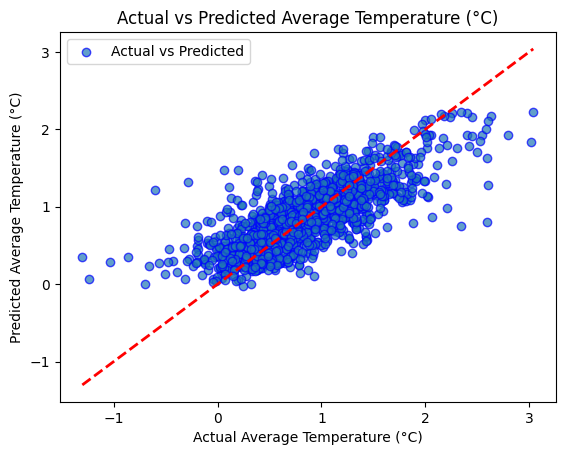

In [157]:
# Plot the results
plt.scatter(y_test, y_pred_stack, alpha=0.7, edgecolors='b', label='Actual vs Predicted')  # Plot actual vs predicted
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color = "red")  # Plot the diagonal line
plt.xlabel('Actual Average Temperature (°C)')
plt.ylabel('Predicted Average Temperature (°C)')
plt.title('Actual vs Predicted Average Temperature (°C)')
plt.legend()
plt.show()

The plot shows that StackingRegressor can closely predict the temperature but however there are more outliers compared to the past 2 models. 

                            Feature  Importance
0                              Year    0.592250
11                             IPPU    0.057721
13           Manure_left_on_Pasture    0.055112
12          Manure_applied_to_Soils    0.037740
4                    Food_Transport    0.030060
16  Fires_in_humid_tropical_forests    0.028668
10        Fertilizers_Manufacturing    0.023466
5                        Forestland    0.022112
14                Manure_Management    0.020608
3       Drained_organic_soils_(CO2)    0.018679
19                   total_emission    0.017727
6             Net_Forest_conversion    0.014260
2                  Rice_Cultivation    0.013655
1                     Savanna_fires    0.013536
9                   Food_Processing    0.012779
17                 Rural_population    0.011614
8                    Food_Packaging    0.011389
15           Fires_in_organic_soils    0.007811
7           On-farm_Electricity_Use    0.006063
18                 Urban_population    0

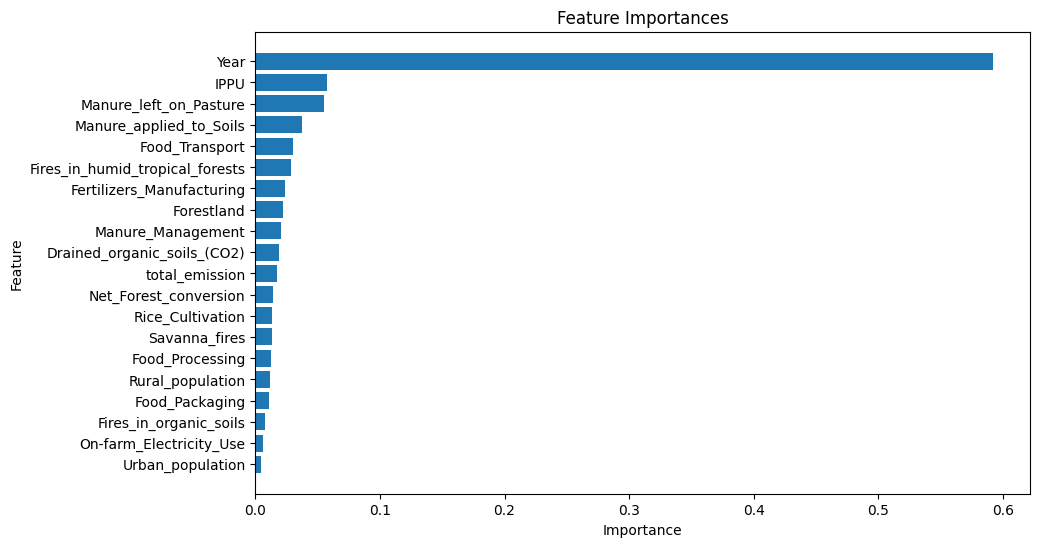

In [158]:
# Extract feature importances if available
importances_list = []
for name, estimator in final_model_stack.named_estimators_.items():
    last_step = list(estimator.named_steps.values())[-1]
    if hasattr(last_step, 'feature_importances_'):
        importances_list.append(last_step.feature_importances_)

# If we have feature importances from any base estimators
if importances_list:
    # Average the feature importances
    importances = np.mean(importances_list, axis=0)

    # Create a DataFrame for feature importances
    feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

    # Exclude features that start with 'area'
    feature_importances = feature_importances[~feature_importances['Feature'].str.startswith('Area')]

    feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

    # Print the feature importances
    print(feature_importances)

    # Plot the feature importances
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importances['Feature'], feature_importances['Importance'])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importances')
    plt.gca().invert_yaxis()
    plt.show()
else:
    print("None of the base estimators provide feature importances.")

The bar graph clearly shows that "Year" is the most influential feature.

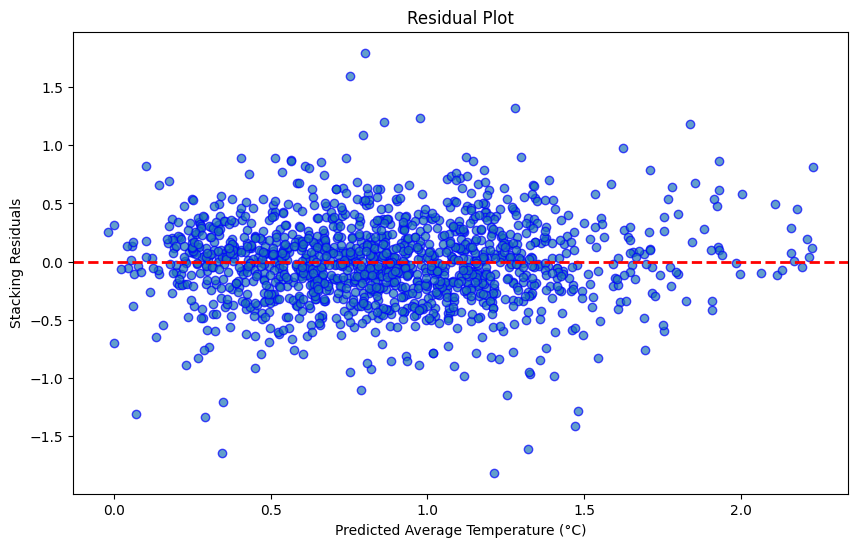

In [159]:
residuals_stack = y_test - y_pred_stack

# Create a residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_stack, residuals_stack, alpha=0.7, edgecolors='b')
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.xlabel('Predicted Average Temperature (°C)')
plt.ylabel('Stacking Residuals')
plt.title('Residual Plot')
plt.show()

Based on the residual plot, there's no indication of heteroscedasticity; in fact, it suggests homoscedasticity as the residuals are evenly dispersed. This suggests that the model might not be biased.


### RandomForestRegressor

In [160]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # You can add more preprocessing steps here
    ('rf', RandomForestRegressor( random_state = 42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred_rf = pipeline.predict(X_test)

In [161]:
# Calculate RMSE and R-squared
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print("RMSE: ", rmse_rf)
print("MAE: ", mae_rf)
print("R-squared: ", r2_rf)

RMSE:  0.3320036886451602
MAE:  0.24230312309017313
R-squared:  0.6404531041142427


### Results Interpretation of RandomForestRegressor

The RandomForestRegressor model has been evaluated with the following performance metrics:

RMSE (Root Mean Squared Error): With a value of 0.332, this metric indicates that, on average, the model's predictions are approximately 0.33 degrees Celsius away from the actual temperatures.

MAE (Mean Absolute Error): The MAE of approximately 0.24 suggests that, on average, the model's predictions are around 0.24 degrees Celsius off from the actual temperatures.

R-squared: The R-squared value of approximately 0.64 indicates that the model can explain about 64% of the variability in temperatures using the provided data.

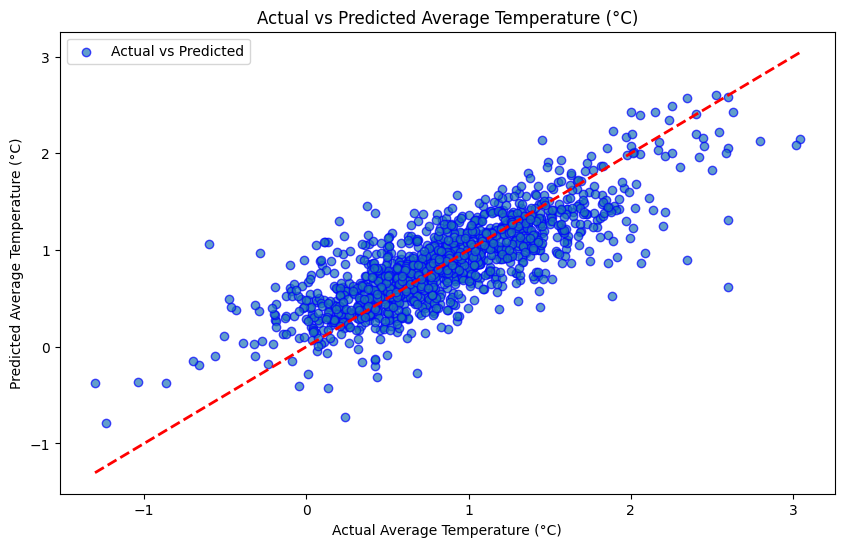

In [162]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.7, edgecolors='b', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.xlabel('Actual Average Temperature (°C)')
plt.ylabel('Predicted Average Temperature (°C)')
plt.title('Actual vs Predicted Average Temperature (°C)')
plt.legend()
plt.show()

In the plots, most of the points are closer to the red line, suggesting that Random Forest can predict the temperatures well. However, a few points that are away from the line are noted.

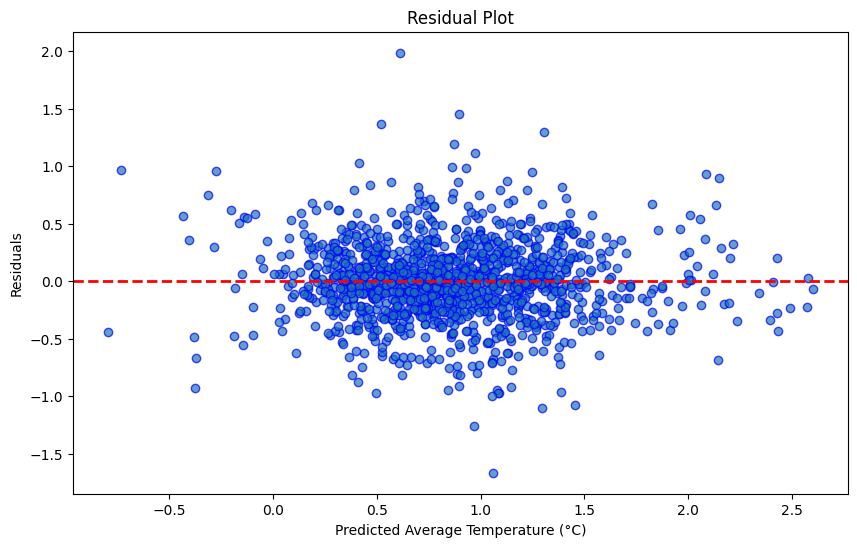

In [163]:
# Calculate the residuals
residuals = y_test - y_pred_rf

# Create a residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_rf, residuals, alpha=0.7, edgecolors='b')
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.xlabel('Predicted Average Temperature (°C)')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

The residuals from the plot are evenly scattered around the red line, suggesting that the model may not suffer from bias.

In [164]:
rmse_XGB

0.3178468763839353

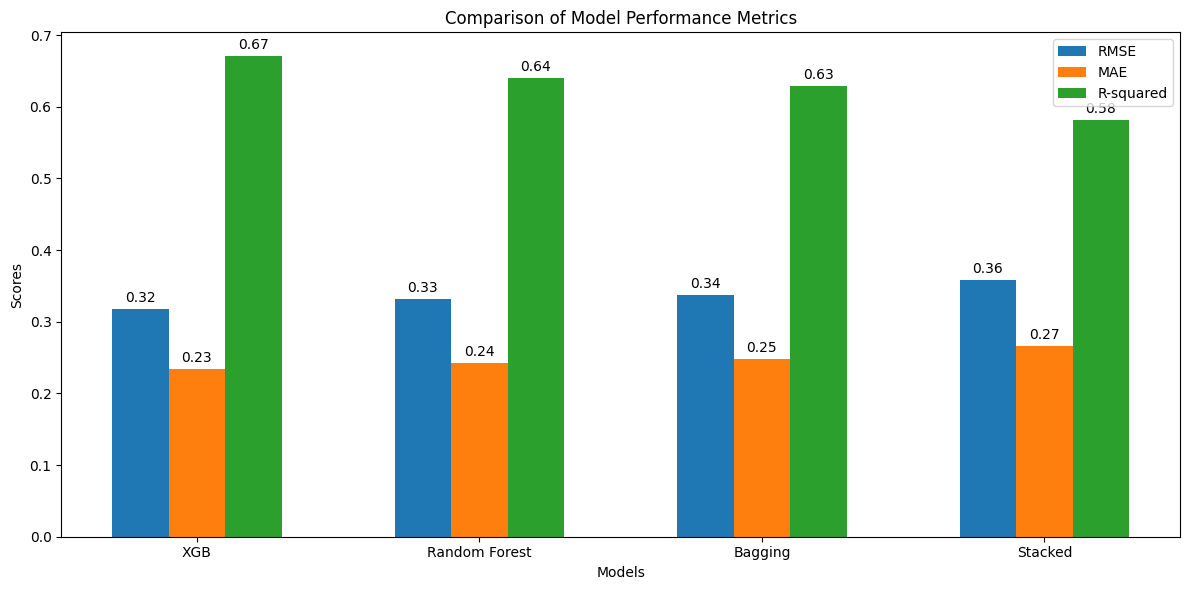

In [165]:
# Performance metrics for each model
metrics = {
    'XGB': {'RMSE': rmse_XGB, 'MAE': mae_XGB, 'R-squared': r2_XGB},
    'Random Forest': {'RMSE': rmse_rf, 'MAE': mae_rf, 'R-squared': r2_rf},
    'Bagging': {'RMSE': rmse_bag, 'MAE': mae_bag, 'R-squared': r2_bag},
    'Stacked': {'RMSE': rmse_stack, 'MAE': mae_stack, 'R-squared': r2_stack}
}

# Metrics and models
metrics_names = ['RMSE', 'MAE', 'R-squared']
models = list(metrics.keys())

# Prepare data for plotting
rmse_values = [metrics[model]['RMSE'] for model in models]
mae_values = [metrics[model]['MAE'] for model in models]
r2_values = [metrics[model]['R-squared'] for model in models]

x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# RMSE bars
rmse_bars = ax.bar(x - width, rmse_values, width, label='RMSE')
# MAE bars
mae_bars = ax.bar(x, mae_values, width, label='MAE')
# R-squared bars
r2_bars = ax.bar(x + width, r2_values, width, label='R-squared')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance Metrics')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Adding labels above the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rmse_bars)
add_labels(mae_bars)
add_labels(r2_bars)

plt.tight_layout()
plt.show()

The best model is selected based on the following:

* RMSE (Root Mean Squared Error): A smaller RMSE indicates that the model's predictions are closer to the actual values, on average. It measures the average magnitude of the errors between predicted and actual values.

* MAE (Mean Absolute Error): Like RMSE, a smaller MAE indicates that the model's predictions are closer to the actual values, on average. It measures the average absolute difference between predicted and actual values.

* R-squared (Coefficient of Determination): R-squared represents the proportion of the variance in the dependent variable (target) that is predictable from the independent variables (features). A higher R-squared value (close to 1) indicates that a larger proportion of the variance in the target variable is explained by the independent variables, suggesting a better fit of the model to the data



Based on the metrics from the bar graph, the XGBoost Regressor performs the best overall, with the lowest RMSE and MAE, and the highest R-squared value. Therefore, the XGBoost model appears to be the most suitable for predicting temperatures in this scenario.
